In [419]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from spicy import stats # type:ignore
from sklearn.preprocessing import MinMaxScaler,RobustScaler # type:ignore
from pandas.plotting import andrews_curves # type:ignore
from pandas.plotting import radviz # type:ignore

# data import and preparation

In [420]:
pd.set_option('display.max_columns',None)  

In [421]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [422]:
raw_data

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
1           28,748             9,000       11.78         355.0   
2        2,381,741           317,000       24.28         213.0   
3              468               NaN        7.20         376.0   
4        1,246,700           117,000       40.73         244.0   
..             ...               ...         ...           ...   
190        912,050           343,000       17.88          58.0   
191        331,210           522,000       16.75          84.0   
192        527,968            40,000       30.45         967.0   
193        752,618            16,000       36.19         260.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions       CPI CPI Change (%) Currency-Code  \
0                Kabul         8,672     149.9          2.30%           AFN   
1               Tirana         4,536    119.05          1.40%           ALL   
2              Algiers       150,006    151.36          2.00%           DZD   
3     Andorra la Vella           469       NaN            NaN           EUR   
4               Luanda        34,693    261.73         17.10%           AOA   
..                 ...           ...       ...            ...           ...   
190            Caracas       164,175  2,740.27        254.90%           VED   
191              Hanoi       192,668    163.52          2.80%           VND   
192              Sanaa        10,609    157.58          8.10%           YER   
193             Lusaka         5,141    212.31          9.20%           ZMW   
194             Harare        10,983    105.51          0.90%           NaN   

     Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0              4.47             2.10%         $0.70    $19,101,353,833    
1              1.62            28.10%         $1.36    $15,278,077,447    
2              3.02             0.80%         $0.28   $169,988,236,398    
3              1.27            34.00%         $1.51     $3,154,057,987    
4              5.52            46.30%         $0.97    $94,635,415,870    
..              ...               ...            ...                ...   
190            2.27            52.70%         $0.00   $482,359,318,768    
191            2.05            48.10%         $0.80   $261,921,244,843    
192            3.79             1.00%         $0.92    $26,914,402,224    
193            4.63            65.20%         $1.40    $23,064,722,446    
194            3.62            35.50%         $1.34    $21,440,758,800    

    Gross primary education enrollment (%)  \
0                                  104.00%   
1                                  107.00%   
2                                  109.90%   
3                                  106.40%   
4                                  113.50%   
..                                     ...   
190                                 97.20%   
191                                110.60%   
192                                 93.60%   
193                                 98.70

In [423]:

raw_data = raw_data.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)',
                                    'Agricultural Land( %)':'Agricultural Land(%)',
                                    'Armed Forces size':'Armed Forces',
                                    'Capital/Major City':'Capital',
                                    'CPI Change (%)':'CPI Change(%)',
                                    'Forested Area (%)':'Forested Area(%)',
                                    'Gross primary education enrollment (%)':'Primary educ. enr.(%)',
                                    'Gross tertiary education enrollment (%)':'Tertiary educ. enr.(%)',
                                    'Out of pocket health expenditure':'Self-paid Health',
                                    'Tax revenue (%)':'Tax revenue(%)',
                                    'Official language':'Language',
                                    'Physicians per thousand':'Doctors/1000',
                                    'Population: Labor force participation (%)':'Labor force participation(%)',
                                    'Urban_population':'Urban population'})

In [424]:
raw_data.iloc[150]

Country                          S�����������
Density(P/Km2)                            228
Abbreviation                               ST
Agricultural Land(%)                   50.70%
Land Area(Km2)                            964
Armed Forces                            1,000
Birth Rate                              31.54
Calling Code                            239.0
Capital                                 S����
Co2-Emissions                             121
CPI                                    185.09
CPI Change(%)                           7.90%
Currency-Code                             STN
Fertility Rate                           4.32
Forested Area(%)                       55.80%
Gasoline Price                            NaN
GDP                             $429,016,605 
Primary educ. enr.(%)                 106.80%
Tertiary educ. enr.(%)                 13.40%
Infant mortality                         24.4
Largest city                            S����
Life expectancy                   

In [425]:
raw_data.drop(raw_data.index[150],axis=0,inplace=True)

In [426]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       194 non-null    object 
 1   Density(P/Km2)                194 non-null    object 
 2   Abbreviation                  187 non-null    object 
 3   Agricultural Land(%)          187 non-null    object 
 4   Land Area(Km2)                193 non-null    object 
 5   Armed Forces                  170 non-null    object 
 6   Birth Rate                    188 non-null    float64
 7   Calling Code                  193 non-null    float64
 8   Capital                       191 non-null    object 
 9   Co2-Emissions                 187 non-null    object 
 10  CPI                           177 non-null    object 
 11  CPI Change(%)                 178 non-null    object 
 12  Currency-Code                 179 non-null    object 
 13  Fertility 

In [427]:
raw_data.loc[:,'Country':'Birth Rate']

Country Density(P/Km2) Abbreviation Agricultural Land(%)  \
0    Afghanistan             60           AF               58.10%   
1        Albania            105           AL               43.10%   
2        Algeria             18           DZ               17.40%   
3        Andorra            164           AD               40.00%   
4         Angola             26           AO               47.50%   
..           ...            ...          ...                  ...   
190    Venezuela             32           VE               24.50%   
191      Vietnam            314           VN               39.30%   
192        Yemen             56           YE               44.60%   
193       Zambia             25           ZM               32.10%   
194     Zimbabwe             38           ZW               41.90%   

    Land Area(Km2) Armed Forces  Birth Rate  
0          652,230      323,000       32.49  
1           28,748        9,000       11.78  
2        2,381,741      317,000       24.28  
3              468          NaN        7.20  
4        1,246,700      117,000       40.73  
..             ...          ...         ...  
190        912,050      343,000       17.88  
191        331,210      522,000       16.75  
192        527,968       40,000       30.45  
193        752,618       16,000       36.19  
194        390,757       51,000       30.68  

[194 rows x 7 columns]

In [428]:
raw_data.loc[:,'Calling Code':'Fertility Rate']

Calling Code           Capital Co2-Emissions       CPI CPI Change(%)  \
0            93.0             Kabul         8,672     149.9         2.30%   
1           355.0            Tirana         4,536    119.05         1.40%   
2           213.0           Algiers       150,006    151.36         2.00%   
3           376.0  Andorra la Vella           469       NaN           NaN   
4           244.0            Luanda        34,693    261.73        17.10%   
..            ...               ...           ...       ...           ...   
190          58.0           Caracas       164,175  2,740.27       254.90%   
191          84.0             Hanoi       192,668    163.52         2.80%   
192         967.0             Sanaa        10,609    157.58         8.10%   
193         260.0            Lusaka         5,141    212.31         9.20%   
194         263.0            Harare        10,983    105.51         0.90%   

    Currency-Code  Fertility Rate  
0             AFN            4.47  
1             ALL            1.62  
2             DZD            3.02  
3             EUR            1.27  
4             AOA            5.52  
..            ...             ...  
190           VED            2.27  
191           VND            2.05  
192           YER            3.79  
193           ZMW            4.63  
194           NaN            3.62  

[194 rows x 7 columns]

In [429]:
raw_data.loc[:,'Life expectancy':'Population']

Life expectancy  Maternal mortality ratio Minimum wage    Language  \
0               64.5                     638.0       $0.43       Pashto   
1               78.5                      15.0       $1.12     Albanian   
2               76.7                     112.0       $0.95       Arabic   
3                NaN                       NaN       $6.63      Catalan   
4               60.8                     241.0       $0.71   Portuguese   
..               ...                       ...          ...         ...   
190             72.1                     125.0       $0.01      Spanish   
191             75.3                      43.0       $0.73   Vietnamese   
192             66.1                     164.0          NaN      Arabic   
193             63.5                     213.0       $0.24      English   
194             61.2                     458.0          NaN       Shona   

    Self-paid Health  Doctors/1000  Population  
0             78.40%          0.28  38,041,754  
1             56.90%          1.20   2,854,191  
2             28.10%          1.72  43,053,054  
3             36.40%          3.33      77,142  
4             33.40%          0.21  31,825,295  
..               ...           ...         ...  
190           45.80%          1.92  28,515,829  
191           43.50%          0.82  96,462,106  
192           81.00%          0.31  29,161,922  
193           27.50%          1.19  17,861,030  
194           25.80%          0.21  14,645,468  

[194 rows x 7 columns]

In [430]:
raw_data.loc[:,'Forested Area(%)':'Largest city'] 

Forested Area(%) Gasoline Price                GDP Primary educ. enr.(%)  \
0              2.10%         $0.70    $19,101,353,833                104.00%   
1             28.10%         $1.36    $15,278,077,447                107.00%   
2              0.80%         $0.28   $169,988,236,398                109.90%   
3             34.00%         $1.51     $3,154,057,987                106.40%   
4             46.30%         $0.97    $94,635,415,870                113.50%   
..               ...            ...                ...                   ...   
190           52.70%         $0.00   $482,359,318,768                 97.20%   
191           48.10%         $0.80   $261,921,244,843                110.60%   
192            1.00%         $0.92    $26,914,402,224                 93.60%   
193           65.20%         $1.40    $23,064,722,446                 98.70%   
194           35.50%         $1.34    $21,440,758,800                109.90%   

    Tertiary educ. enr.(%)  Infant mortality      Largest city  
0                    9.70%              47.9             Kabul  
1                   55.00%               7.8            Tirana  
2                   51.40%              20.1           Algiers  
3                      NaN               2.7  Andorra la Vella  
4                    9.30%              51.6            Luanda  
..                     ...               ...               ...  
190                 79.30%              21.4           Caracas  
191                 28.50%              16.5  Ho Chi Minh City  
192                 10.20%              42.9             Sanaa  
193                  4.10%              40.4            Lusaka  
194                 10.00%              33.9            Harare  

[194 rows x 7 columns]

In [431]:
raw_data.loc[:,'Labor force participation(%)':]

Labor force participation(%) Tax revenue(%) Total tax rate  \
0                         48.90%          9.30%         71.40%   
1                         55.70%         18.60%         36.60%   
2                         41.20%         37.20%         66.10%   
3                            NaN            NaN            NaN   
4                         77.50%          9.20%         49.10%   
..                           ...            ...            ...   
190                       59.70%            NaN         73.30%   
191                       77.40%         19.10%         37.60%   
192                       38.00%            NaN         26.60%   
193                       74.60%         16.20%         15.60%   
194                       83.10%         20.70%         31.60%   

    Unemployment rate Urban population   Latitude   Longitude  
0              11.12%        9,797,273  33.939110   67.709953  
1              12.33%        1,747,593  41.153332   20.168331  
2              11.70%       31,510,100  28.033886    1.659626  
3                 NaN           67,873  42.506285    1.521801  
4               6.89%       21,061,025 -11.202692   17.873887  
..                ...              ...        ...         ...  
190             8.80%       25,162,368   6.423750  -66.589730  
191             2.01%       35,332,140  14.058324  108.277199  
192            12.91%       10,869,523  15.552727   48.516388  
193            11.43%        7,871,713 -13.133897   27.849332  
194             4.95%        4,717,305 -19.015438   29.154857  

[194 rows x 7 columns]

In [432]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital','Currency-Code','Largest city','Language',
                        'Latitude','Longitude'],axis=1)

In [433]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [434]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

In [435]:
ordered_columns = [
    # demography
    "Country","Density(P/Km2)","Urban population","Population",
    
    # economy
    "Armed Forces","GDP","Minimum wage","Labor force participation(%)","Unemployment rate","Tax revenue(%)","Total tax rate","CPI","CPI Change(%)",
    
    # health
    "Doctors/1000","Self-paid Health","Birth Rate","Fertility Rate","Life expectancy","Infant mortality","Maternal mortality ratio",
    
    # enviroment
    "Co2-Emissions","Land Area(Km2)","Forested Area(%)","Agricultural Land(%)","Gasoline Price",
    
    # education
    "Primary educ. enr.(%)", "Tertiary educ. enr.(%)",
]

In [436]:
raw_data = raw_data[ordered_columns]

In [437]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       194 non-null    object 
 1   Density(P/Km2)                194 non-null    float64
 2   Urban population              189 non-null    float64
 3   Population                    193 non-null    float64
 4   Armed Forces                  170 non-null    float64
 5   GDP                           192 non-null    float64
 6   Minimum wage                  150 non-null    float64
 7   Labor force participation(%)  175 non-null    float64
 8   Unemployment rate             175 non-null    float64
 9   Tax revenue(%)                168 non-null    float64
 10  Total tax rate                182 non-null    float64
 11  CPI                           177 non-null    float64
 12  CPI Change(%)                 178 non-null    float64
 13  Doctors/10

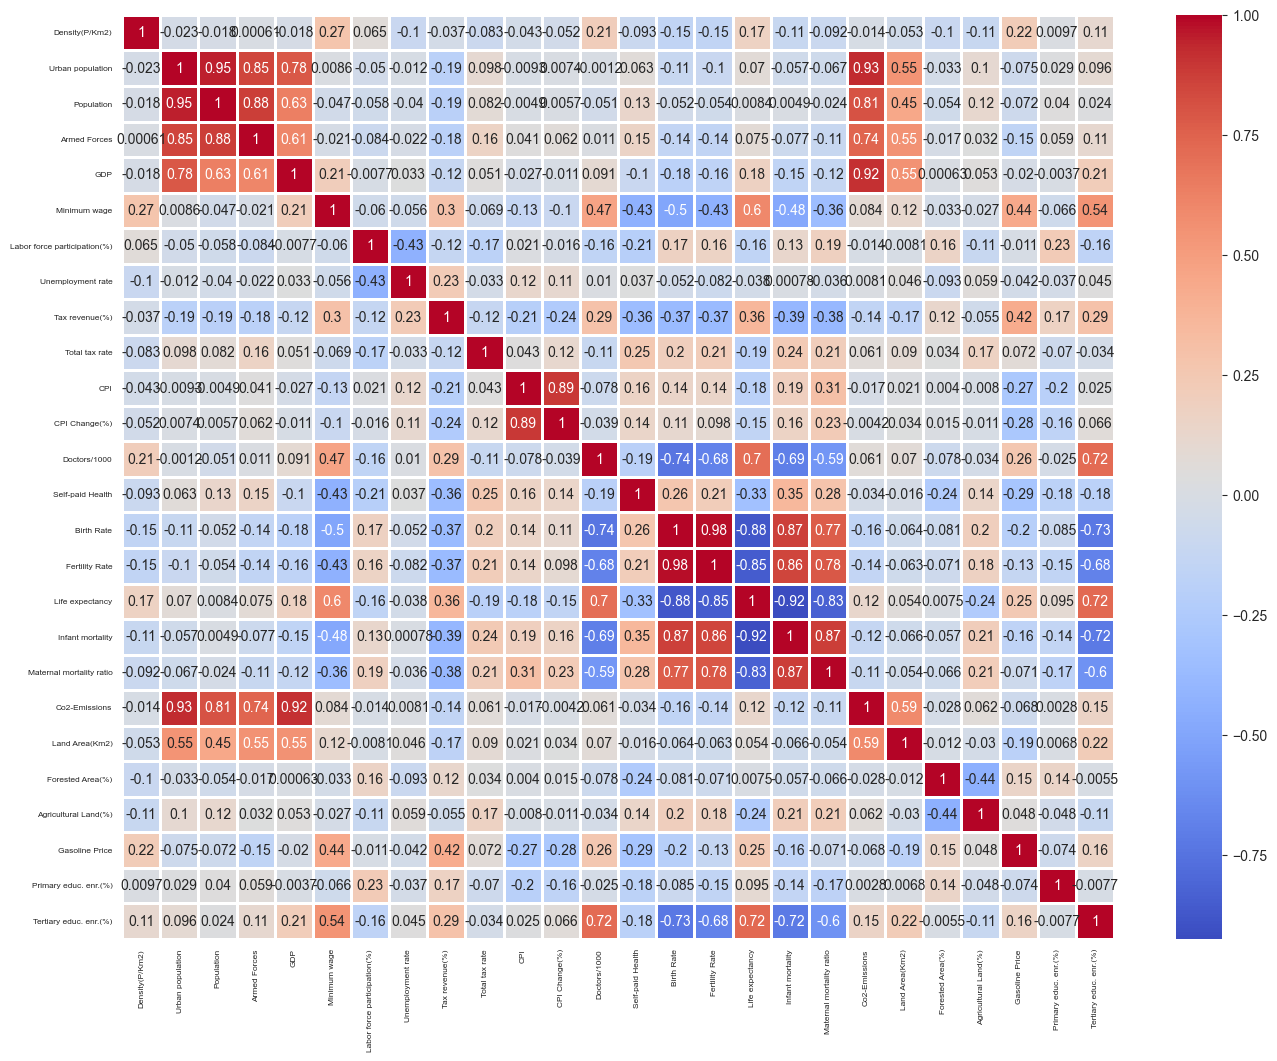

In [438]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

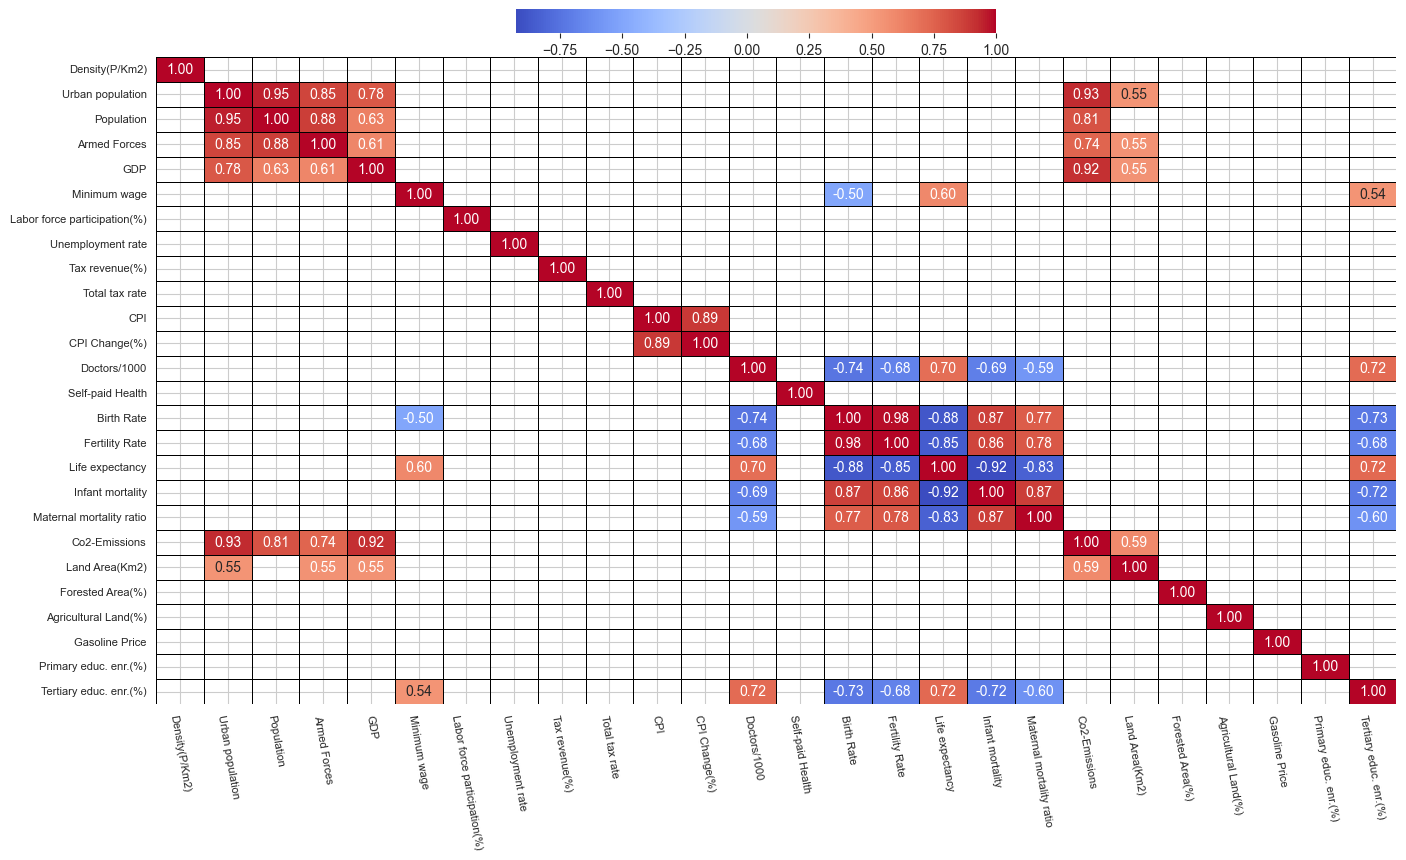

In [439]:
plt.figure(figsize=(16,12))
corr_matrix = raw_data.drop(['Country'],axis=1).corr()

mask = np.abs(corr_matrix) < 0.5 

ax = sns.heatmap(corr_matrix,cmap='coolwarm',linecolor='black',linewidths=0.5,annot=True,fmt=".2f",mask=mask,
                 cbar_kws={"orientation":"horizontal"})  
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.3, 0.9, 0.4, 0.02])  

plt.xticks(fontsize=8, rotation=280)  
plt.yticks(fontsize=8)
plt.show()

In [440]:
dataset = raw_data.drop(['Infant mortality','Land Area(Km2)','Co2-Emissions','CPI Change(%)','Fertility Rate',
                         'Doctors/1000','Gasoline Price','Minimum wage','Tertiary educ. enr.(%)',
                         'Maternal mortality ratio','Life expectancy','Tax revenue(%)','Population','Urban population'],axis=1)

In [441]:
dataset.dropna(inplace=True)

In [442]:
dataset.head()

Country  Density(P/Km2)  Armed Forces           GDP  \
0  Afghanistan            60.0      323000.0  1.910135e+10   
1      Albania           105.0        9000.0  1.527808e+10   
2      Algeria            18.0      317000.0  1.699882e+11   
4       Angola            26.0      117000.0  9.463542e+10   
6    Argentina            17.0      105000.0  4.496634e+11   

   Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
0                          48.9              11.12            71.4  149.90   
1                          55.7              12.33            36.6  119.05   
2                          41.2              11.70            66.1  151.36   
4                          77.5               6.89            49.1  261.73   
6                          61.3               9.79           106.3  232.75   

   Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0              78.4       32.49               2.1                  58.1   
1              56.9       11.78              28.1                  43.1   
2              28.1       24.28               0.8                  17.4   
4              33.4       40.73              46.3                  47.5   
6              17.6       17.02               9.8                  54.3   

   Primary educ. enr.(%)  
0                  104.0  
1                  107.0  
2                  109.9  
4                  113.5  
6                  109.7

In [443]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       159 non-null    object 
 1   Density(P/Km2)                159 non-null    float64
 2   Armed Forces                  159 non-null    float64
 3   GDP                           159 non-null    float64
 4   Labor force participation(%)  159 non-null    float64
 5   Unemployment rate             159 non-null    float64
 6   Total tax rate                159 non-null    float64
 7   CPI                           159 non-null    float64
 8   Self-paid Health              159 non-null    float64
 9   Birth Rate                    159 non-null    float64
 10  Forested Area(%)              159 non-null    float64
 11  Agricultural Land(%)          159 non-null    float64
 12  Primary educ. enr.(%)         159 non-null    float64
dtypes: float64

In [444]:
dataset.describe().round(2)

Density(P/Km2)  Armed Forces           GDP  \
count          159.00        159.00  1.590000e+02   
mean           212.67     157276.73  5.769626e+11   
std            709.94     379578.36  2.382609e+12   
min              2.00          0.00  1.340389e+09   
25%             31.50      11000.00  1.458843e+10   
50%             83.00      30000.00  5.374216e+10   
75%            151.50     137000.00  3.037876e+11   
max           8358.00    3031000.00  2.142770e+13   

       Labor force participation(%)  Unemployment rate  Total tax rate  \
count                        159.00             159.00          159.00   
mean                          62.76               6.76           39.84   
std                           10.30               4.91           15.39   
min                           38.00               0.09            8.00   
25%                           56.35               3.39           30.60   
50%                           62.20               5.36           37.60   
75%                           69.10               9.09           47.60   
max                           86.80              28.18          106.30   

           CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
count   159.00            159.00      159.00            159.00   
mean    171.17             33.61       20.30             30.32   
std     232.85             18.43        9.98             23.03   
min      99.03              5.30        6.40              0.00   
25%     115.12             18.35       11.15             10.25   
50%     129.00             32.10       18.07             31.10   
75%     160.70             44.05       28.70             46.60   
max    2740.27             81.60       46.08             98.30   

       Agricultural Land(%)  Primary educ. enr.(%)  
count                159.00                 159.00  
mean                  39.39                 103.08  
std                   21.79                  11.86  
min                    0.60                  61.80  
25%                   22.65                  98.90  
50%                   39.70                 102.30  
75%                   55.05                 107.55  
max                   82.60                 142.50

## correlation studies

In [445]:
dataset.drop(['Country',],axis=1).corr()

Density(P/Km2)  Armed Forces       GDP  \
Density(P/Km2)                      1.000000     -0.001290 -0.009600   
Armed Forces                       -0.001290      1.000000  0.632126   
GDP                                -0.009600      0.632126  1.000000   
Labor force participation(%)        0.075252     -0.137519 -0.007924   
Unemployment rate                  -0.115721     -0.000509  0.040901   
Total tax rate                     -0.154217      0.157641  0.089287   
CPI                                -0.044625      0.062395 -0.029068   
Self-paid Health                    0.019932      0.154227 -0.126398   
Birth Rate                         -0.151535     -0.141867 -0.199365   
Forested Area(%)                   -0.120491     -0.026107  0.017478   
Agricultural Land(%)               -0.115463      0.053817  0.053015   
Primary educ. enr.(%)              -0.000878      0.038789 -0.017315   

                              Labor force participation(%)  Unemployment rate  \
Density(P/Km2)                                    0.075252          -0.115721   
Armed Forces                                     -0.137519          -0.000509   
GDP                                              -0.007924           0.040901   
Labor force participation(%)                      1.000000          -0.468224   
Unemployment rate                                -0.468224           1.000000   
Total tax rate                                   -0.154065           0.010612   
CPI                                              -0.077797           0.113466   
Self-paid Health                                 -0.221524           0.025243   
Birth Rate                                        0.191435          -0.030089   
Forested Area(%)                                  0.153208          -0.129999   
Agricultural Land(%)                             -0.081907           0.089747   
Primary educ. enr.(%)                             0.254945          -0.000760   

                              Total tax rate       CPI  Self-paid Health  \
Density(P/Km2)                     -0.154217 -0.044625          0.019932   
Armed Forces                        0.157641  0.062395          0.154227   
GDP                                 0.089287 -0.029068         -0.126398   
Labor force participation(%)       -0.154065 -0.077797         -0.221524   
Unemployment rate                   0.010612  0.113466          0.025243   
Total tax rate                      1.000000  0.196494          0.188749   
CPI                                 0.196494  1.000000          0.124984   
Self-paid Health                    0.188749  0.124984          1.000000   
Birth Rate                          0.214598  0.089229          0.298011   
Forested Area(%)                    0.054069  0.020231         -0.185440   
Agricultural Land(%)                0.093923 -0.021508          0.079904   
Primary educ. enr.(%)              -0.011856 -0.055503         -0.160868   

                              Birth Rate  Forested Area(%)  \
Density(P/Km2)                 -0.151535         -0.120491   
Armed Forces                   -0.141867         -0.026107   
GDP                            -0.199365          0.017478   
Labor force participation(%)    0.191435          0.153208   
Unemployment rate              -0.030089         -0.129999   
Total tax rate                  0.214598          0.054069   
CPI                             0.089229          0.020231   
Self-paid Health                0.298011         -0.185440   
Birth Rate                      1.000000         -0.068833   
Forested Area(%)               -0.068833          1.000000   
Agricultural Land(%)            0.166205         -0.418072   
Primary educ. enr.(%)           0.051584          0.124985   

                              Agricultural Land(%)  Primary educ. enr.(%)  
Density(P/Km2)                           -0.115463              -0.000878  
Armed Forces                              0.053817               0.038789  
GDP            

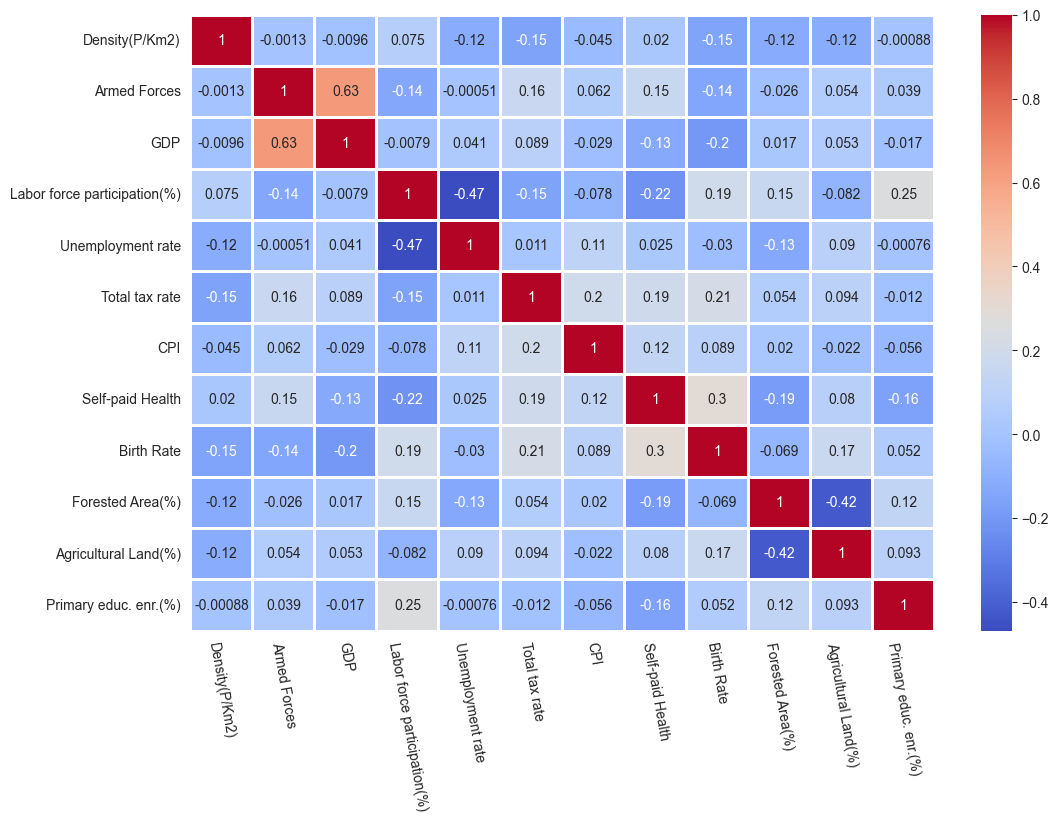

In [446]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(rotation=280)  
plt.show()

# EDA

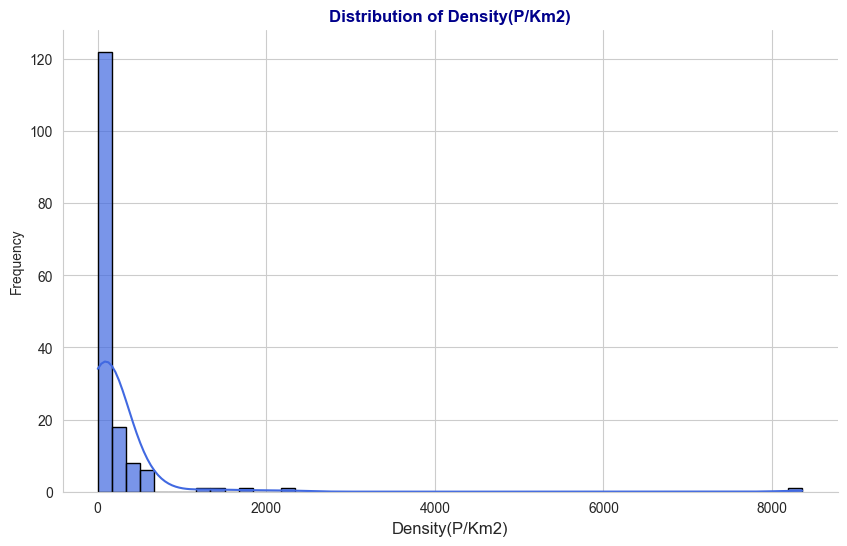

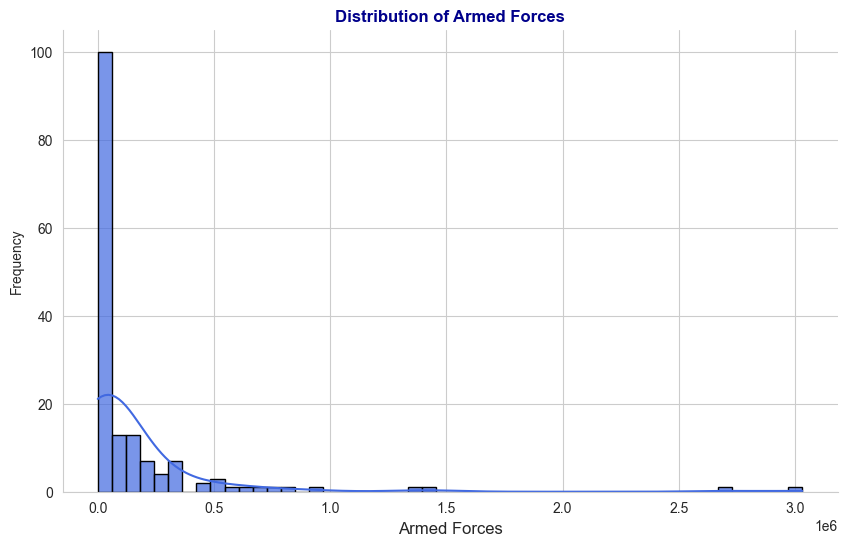

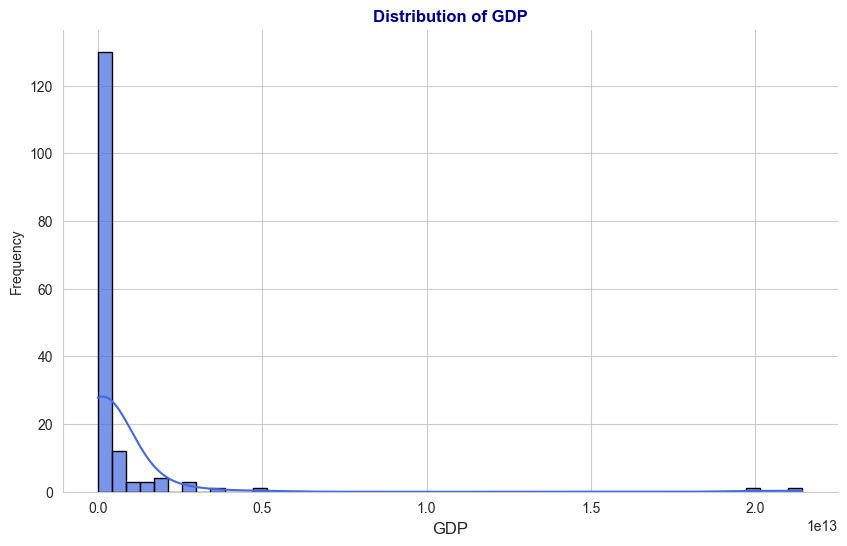

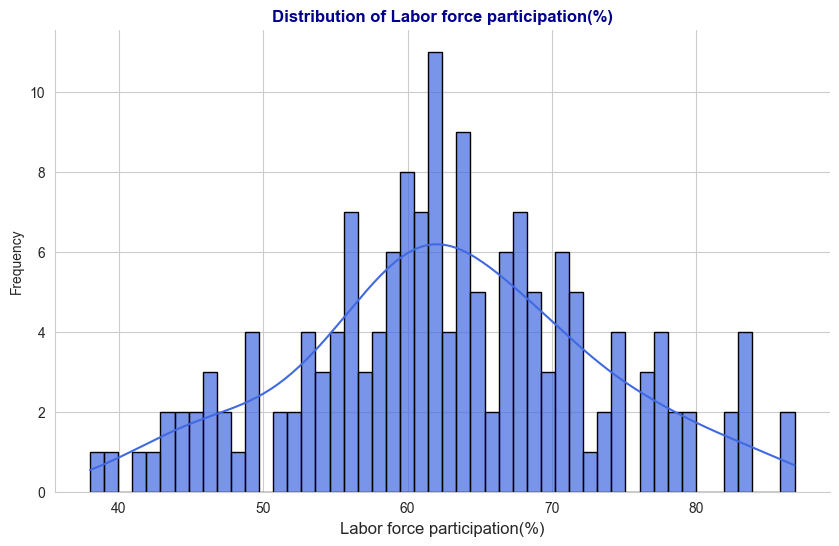

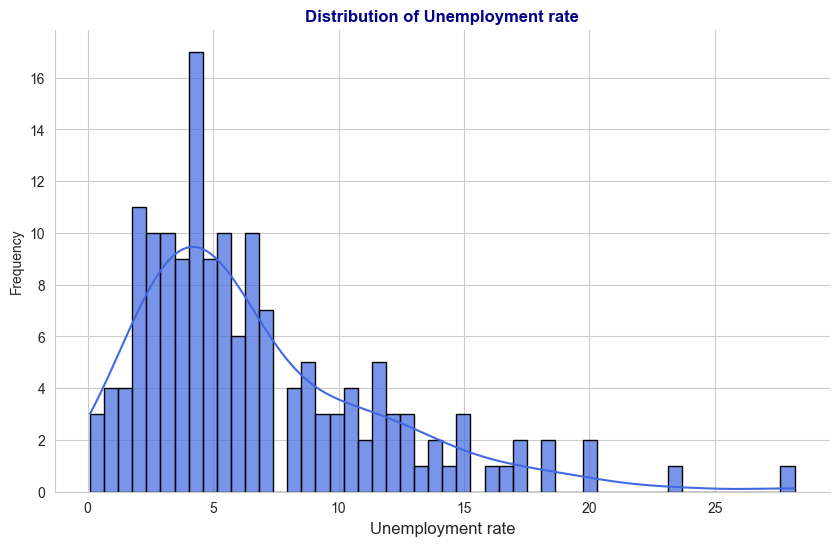

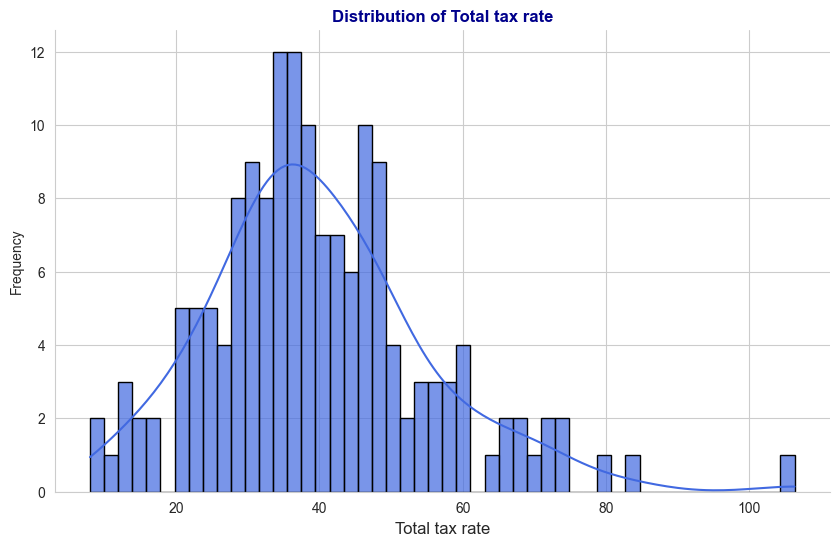

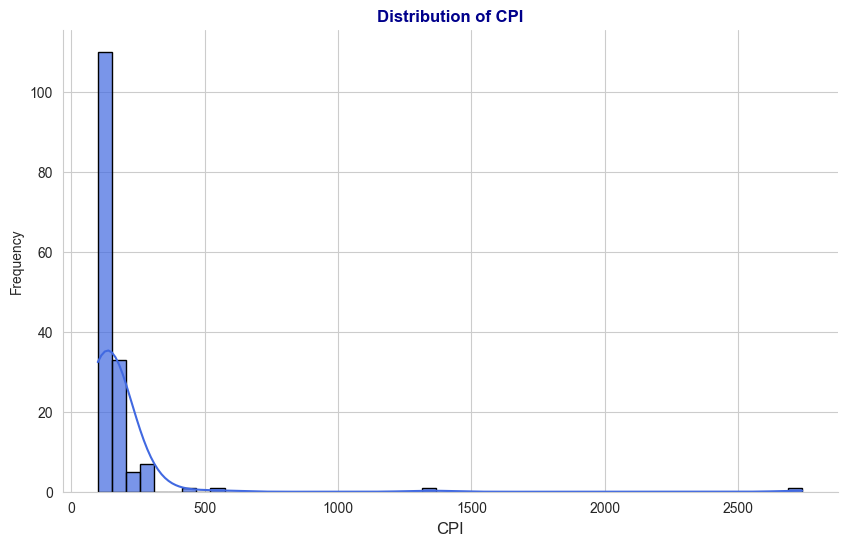

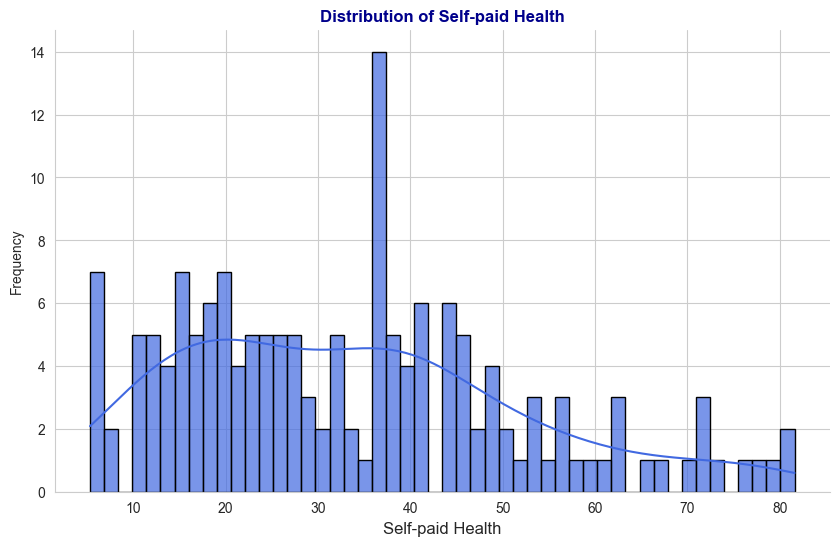

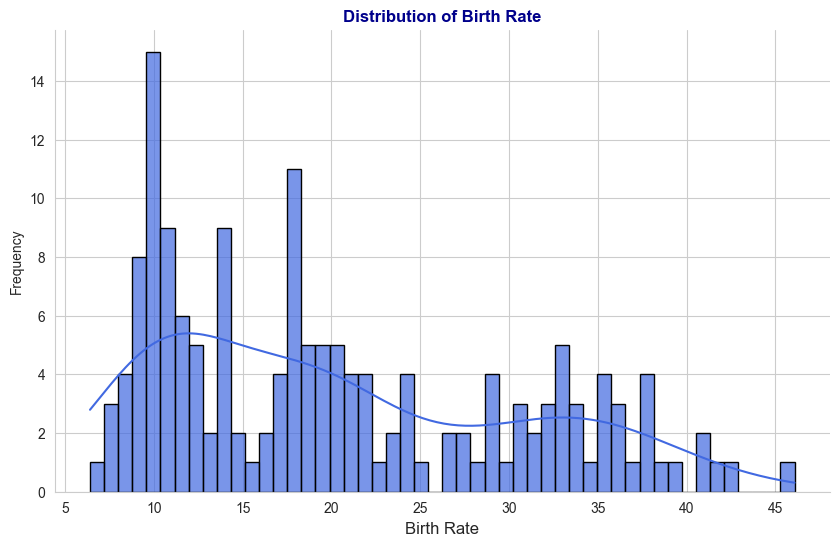

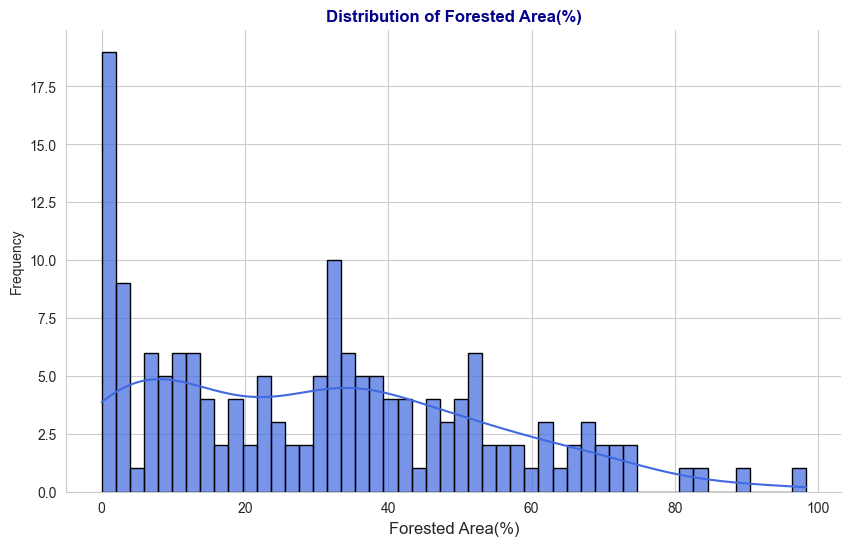

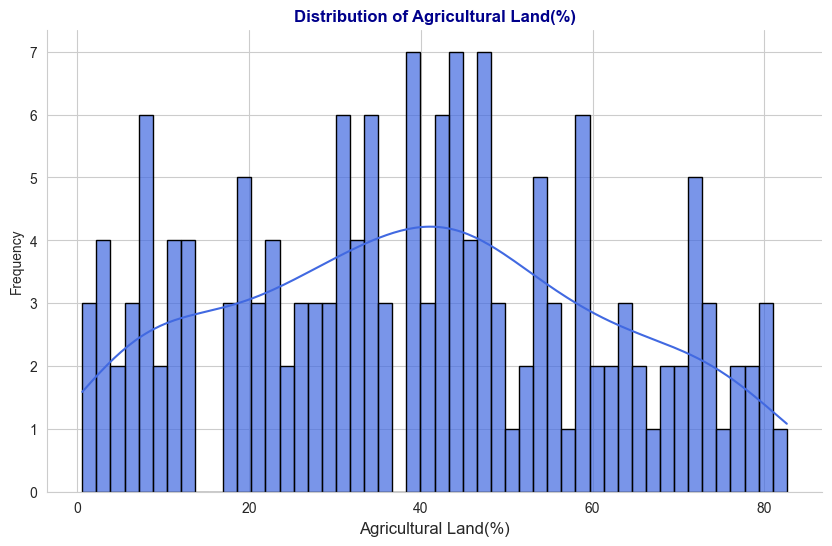

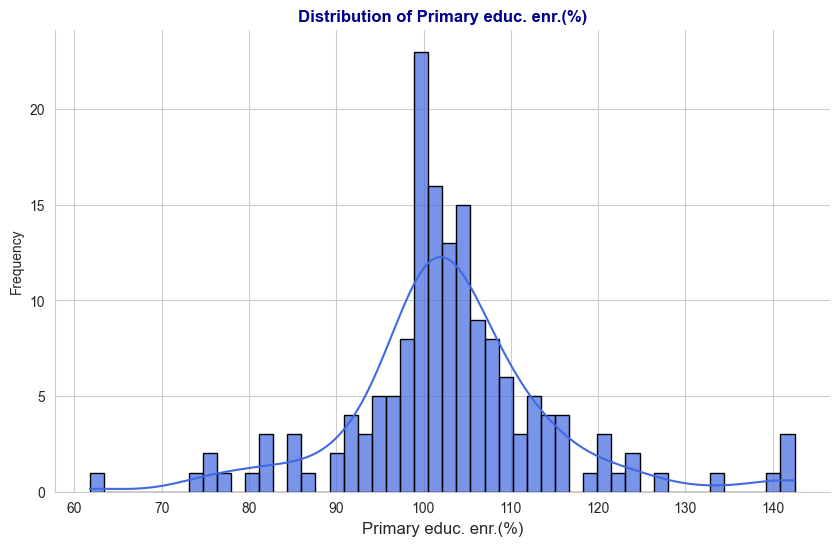

In [447]:
sns.set_style("whitegrid")  

for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(10,6))  
    sns.histplot(dataset[i],kde=True,bins=50,color="royalblue",edgecolor="black",alpha=0.7)
    plt.title(f'Distribution of {i}',fontsize=12,fontweight='bold',color='darkblue')
    plt.xlabel(i,fontsize=12)
    plt.ylabel("Frequency",fontsize=10)
    sns.despine()
    plt.show()

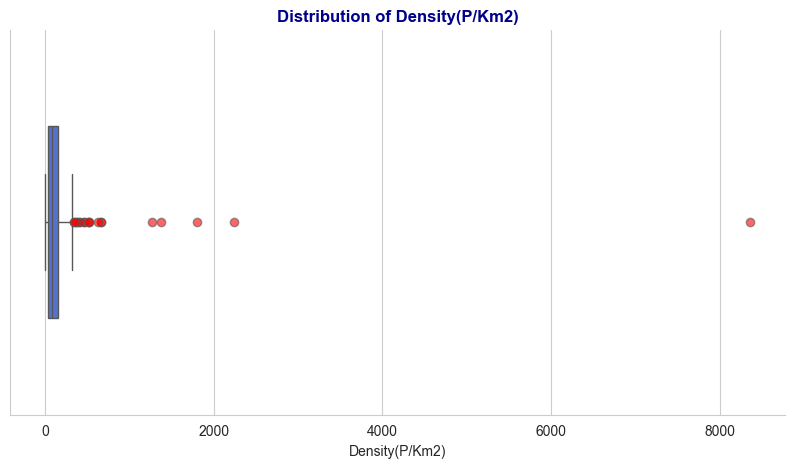

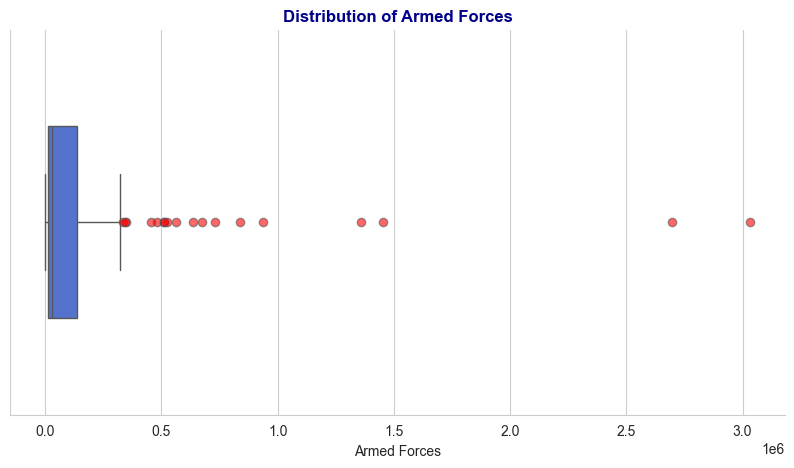

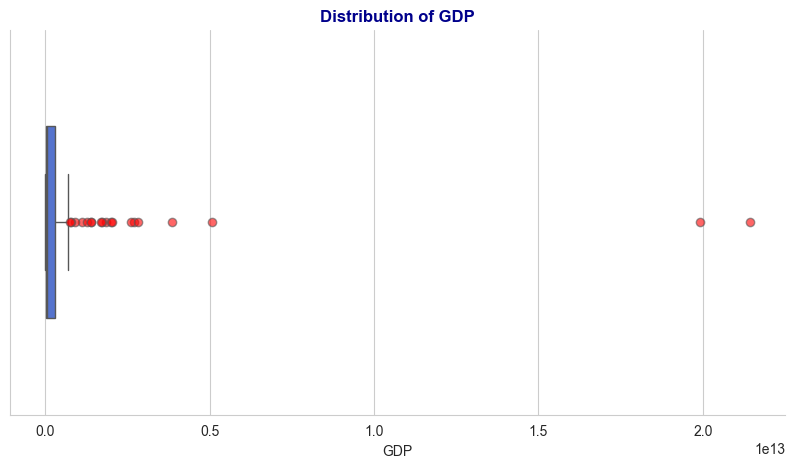

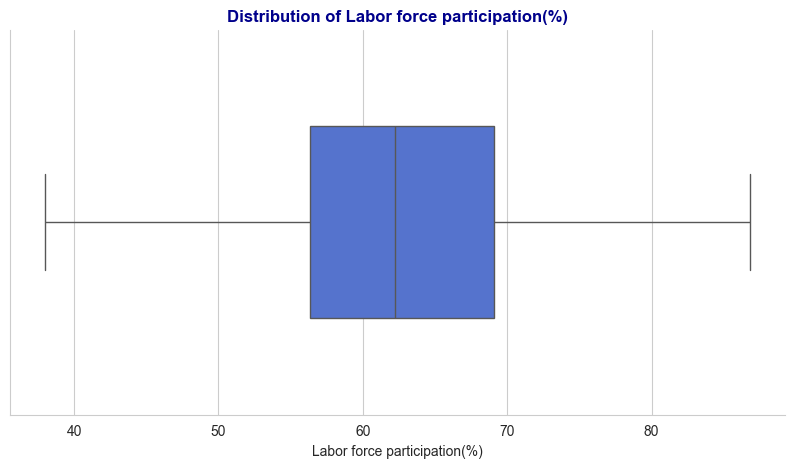

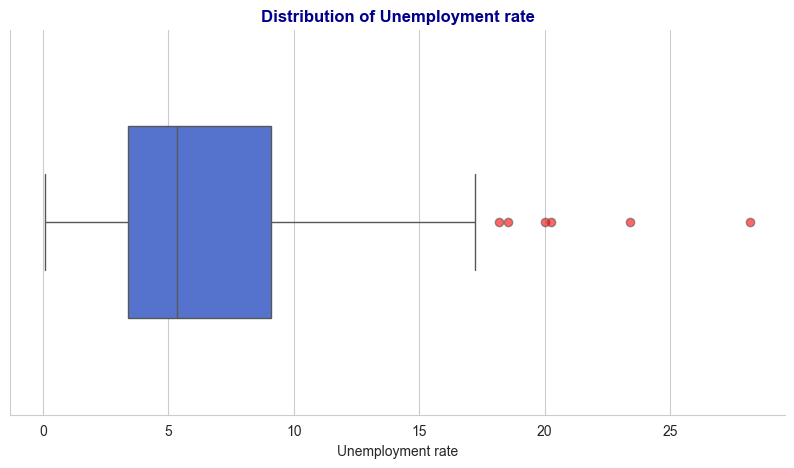

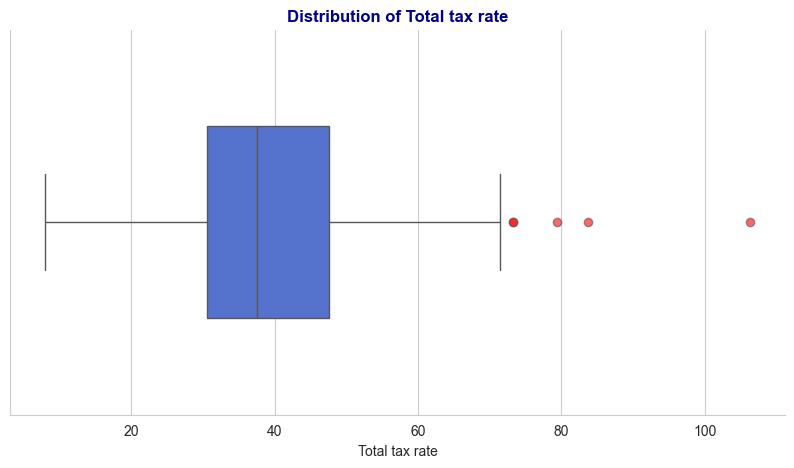

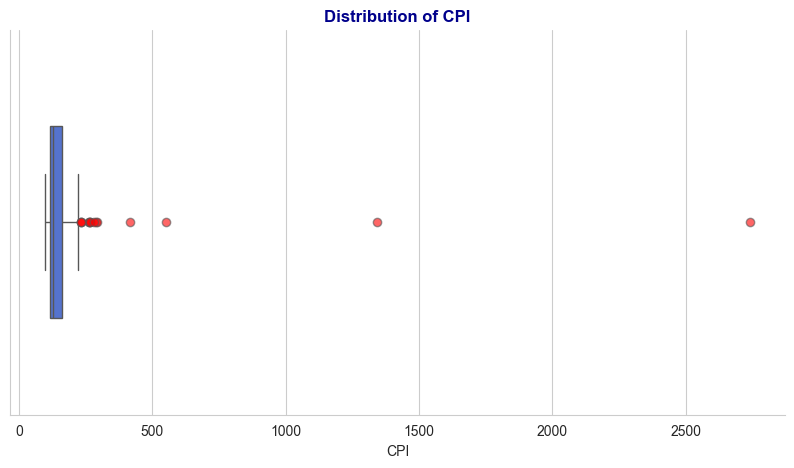

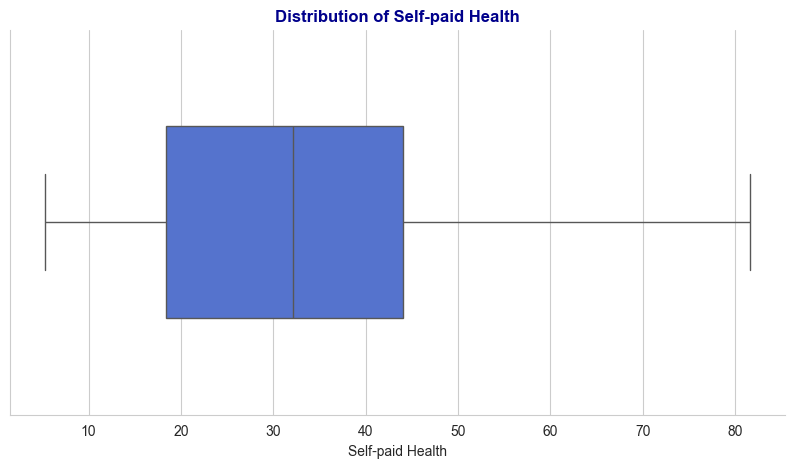

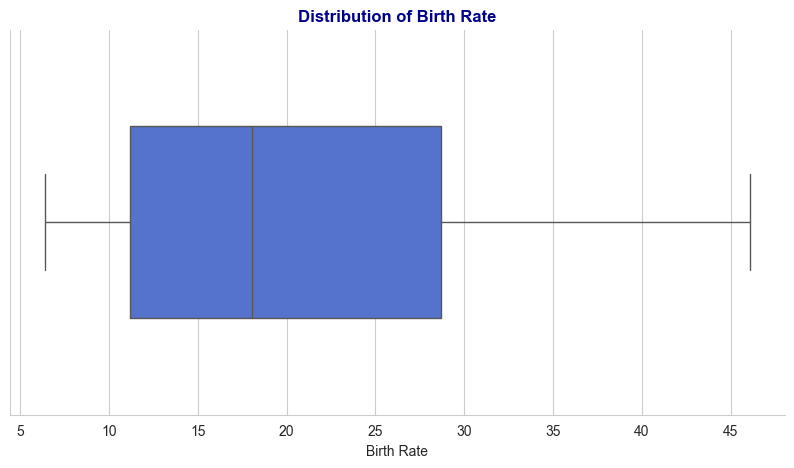

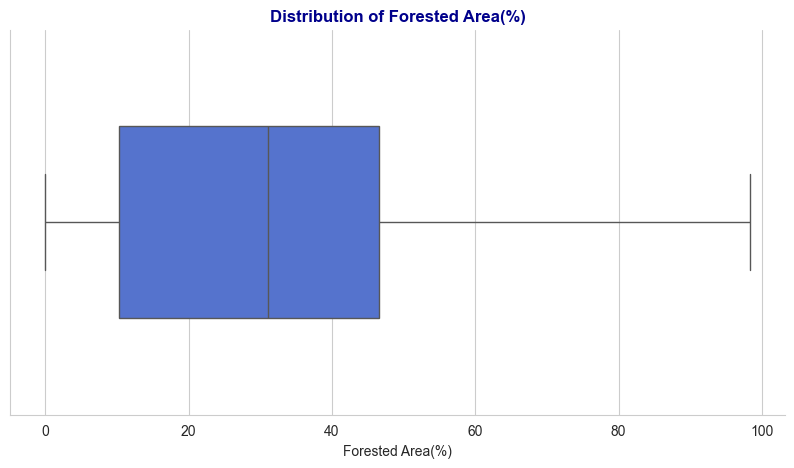

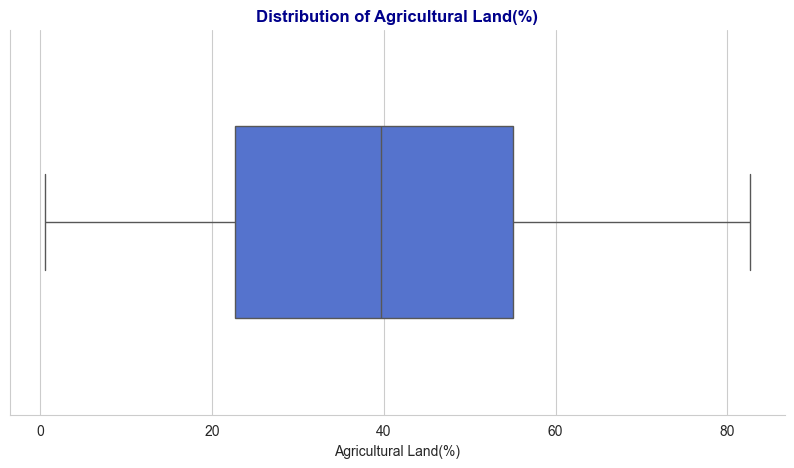

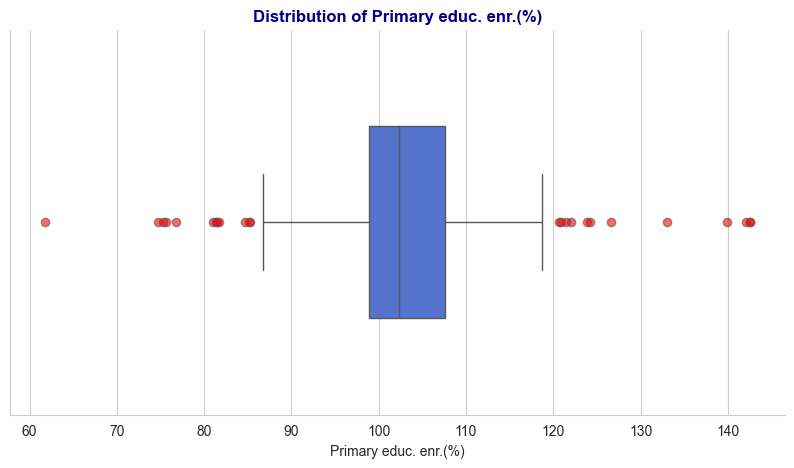

In [448]:
sns.set_style("whitegrid")

for i in dataset.drop('Country', axis=1).columns:
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=dataset[i], color="royalblue", width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'alpha': 0.6})
    plt.title(f'Distribution of {i}', fontsize=12, fontweight='bold', color='darkblue')
    plt.xlabel(i, fontsize=10)
    sns.despine()
    plt.show()

## outliers detection

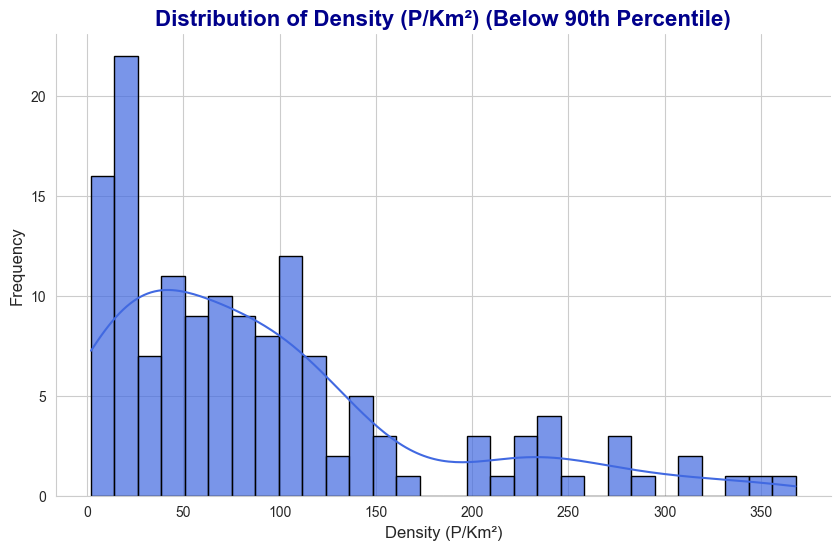

In [449]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.90)]['Density(P/Km2)']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of Density (P/Km²) (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Density (P/Km²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

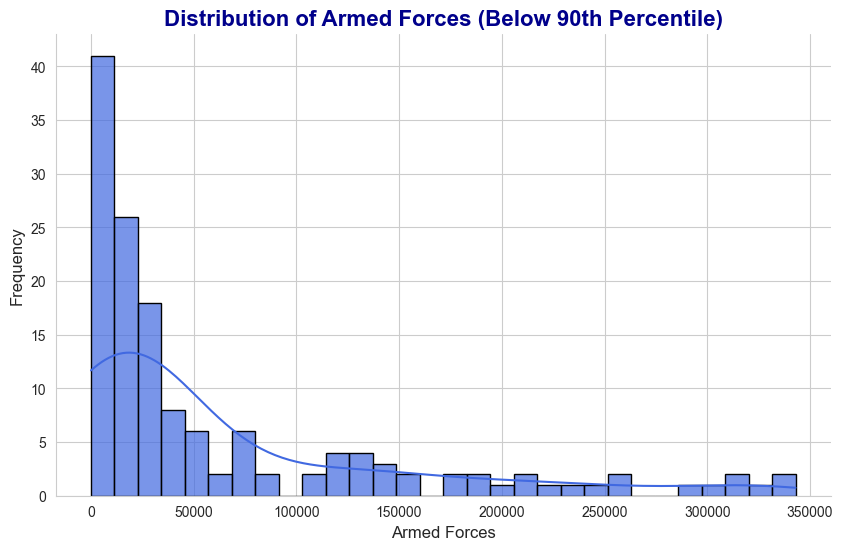

In [450]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.90)]['Armed Forces']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of Armed Forces (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Armed Forces', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

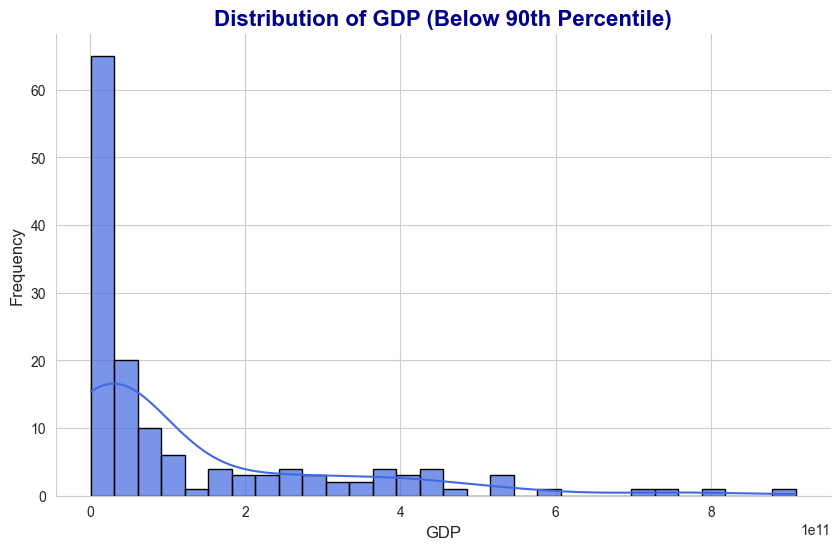

In [451]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['GDP'] < dataset['GDP'].quantile(0.90)]['GDP']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of GDP (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

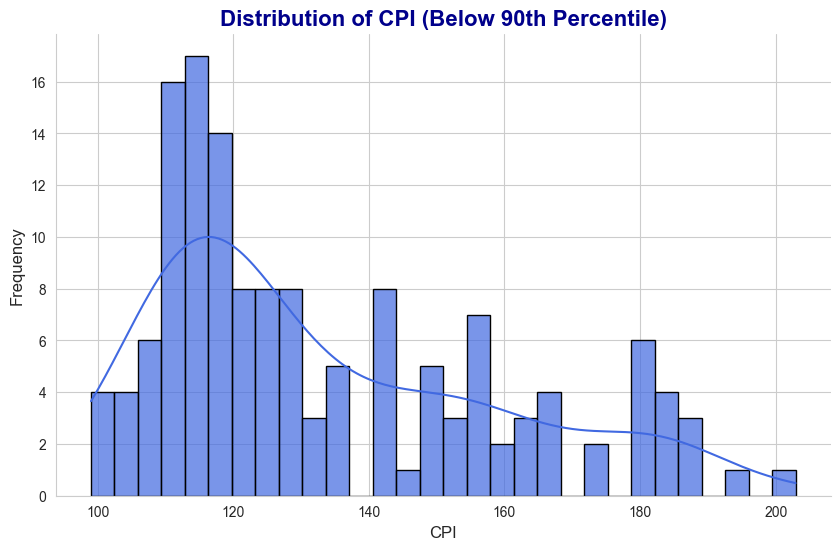

In [452]:
sns.set_style("whitegrid")
filtered_data = dataset[dataset['CPI'] < dataset['CPI'].quantile(0.90)]['CPI']
plt.figure(figsize=(10, 6))  
sns.histplot(filtered_data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Distribution of CPI (Below 90th Percentile)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

In [453]:
dataset[dataset['Density(P/Km2)'] > dataset['Density(P/Km2)'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
12     Bahrain          2239.0       19000.0  3.857407e+10   
156  Singapore          8358.0       81000.0  3.720625e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
12                           73.4               0.71            13.8  117.59   
156                          70.5               4.11            21.0  114.41   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
12               25.1       13.99               0.8                  11.1   
156              36.7        8.80              23.1                   0.9   

     Primary educ. enr.(%)  
12                    99.4  
156                  100.6

In [454]:
dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
114  Mongolia             2.0       18000.0  1.385285e+10   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
114                          59.7               6.01            25.7  195.76   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
114              39.3       24.13               8.0                  71.5   

     Primary educ. enr.(%)  
114                  104.0

In [455]:
dataset[dataset['Armed Forces'] > dataset['Armed Forces'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36   China           153.0     2695000.0  1.991000e+13   
77   India           464.0     3031000.0  2.611000e+12   

    Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                          68.0               4.32            59.2  125.08   
77                          49.3               5.36            49.7  180.44   

    Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36              32.4       10.90              22.4                  56.2   
77              65.1       17.86              23.8                  60.4   

    Primary educ. enr.(%)  
36                  100.2  
77                  113.0

In [456]:
dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.01)]

Empty DataFrame
Columns: [Country, Density(P/Km2), Armed Forces, GDP, Labor force participation(%), Unemployment rate, Total tax rate, CPI, Self-paid Health, Birth Rate, Forested Area(%), Agricultural Land(%), Primary educ. enr.(%)]
Index: []

In [457]:
dataset[dataset['GDP'] > dataset['GDP'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
36           China           153.0     2695000.0  1.991000e+13   
186  United States            36.0     1359000.0  2.142770e+13   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
36                           68.0               4.32            59.2  125.08   
186                          62.0              14.70            36.6  117.24   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
36               32.4        10.9              22.4                  56.2   
186              11.1        11.6              33.9                  44.4   

     Primary educ. enr.(%)  
36                   100.2  
186                  101.8

In [458]:
dataset[dataset['GDP'] < dataset['GDP'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
70   Guinea-Bissau            70.0        4000.0  1.340389e+09   
174     East Timor            89.0        2000.0  1.673540e+09   

     Labor force participation(%)  Unemployment rate  Total tax rate     CPI  \
70                           72.0               2.47            45.5  111.65   
174                          67.3               4.55            17.3  145.38   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
70               37.2       35.13              69.8                  58.0   
174              10.2       29.42              45.4                  25.6   

     Primary educ. enr.(%)  
70                   118.7  
174                  115.3

In [459]:
dataset[dataset['CPI'] > dataset['CPI'].quantile(0.99)]

Country  Density(P/Km2)  Armed Forces           GDP  \
166      Sudan            25.0      124000.0  1.890228e+10   
190  Venezuela            32.0      343000.0  4.823593e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate      CPI  \
166                          48.4              16.53            45.4  1344.19   
190                          59.7               8.80            73.3  2740.27   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
166              63.2       32.18               8.1                  28.7   
190              45.8       17.88              52.7                  24.5   

     Primary educ. enr.(%)  
166                   76.8  
190                   97.2

In [460]:
dataset[dataset['CPI'] < dataset['CPI'].quantile(0.01)]

Country  Density(P/Km2)  Armed Forces           GDP  \
24        Brunei            83.0        8000.0  1.346942e+10   
169  Switzerland           219.0       21000.0  7.030824e+11   

     Labor force participation(%)  Unemployment rate  Total tax rate    CPI  \
24                           64.7               9.12             8.0  99.03   
169                          68.3               4.58            28.8  99.55   

     Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
24                6.0        14.9              72.1                   2.7   
169              28.3        10.0              31.8                  38.4   

     Primary educ. enr.(%)  
24                   103.2  
169                  105.2

## logarithmic trasformations

In [461]:
for i in dataset[['Density(P/Km2)','Armed Forces','GDP','CPI']].columns:
    dataset[i] = np.log1p(dataset[i]) # log(1+x)

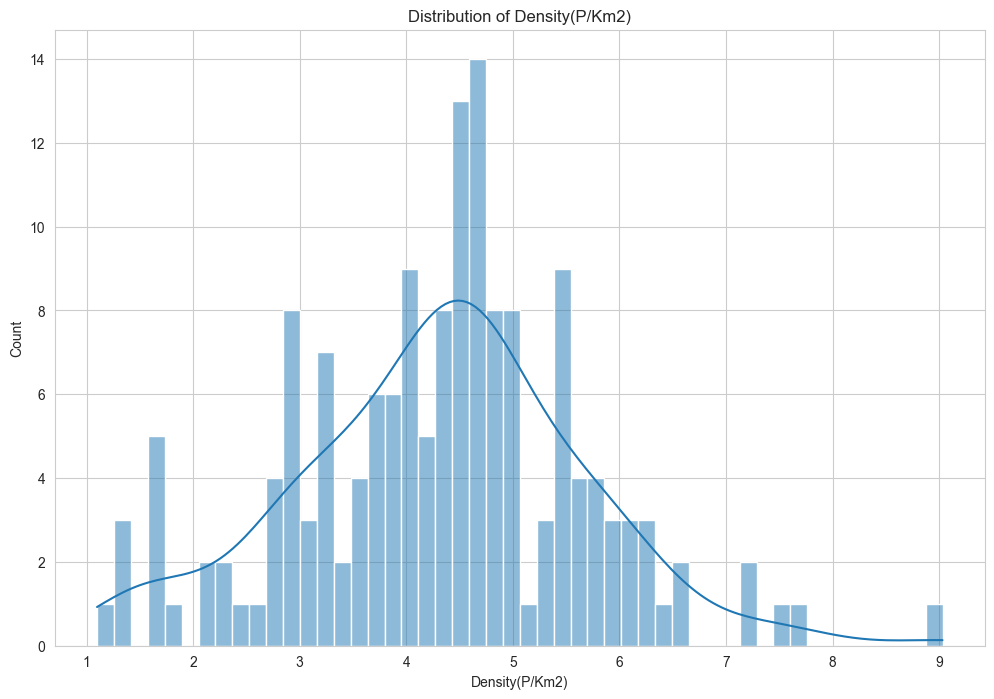

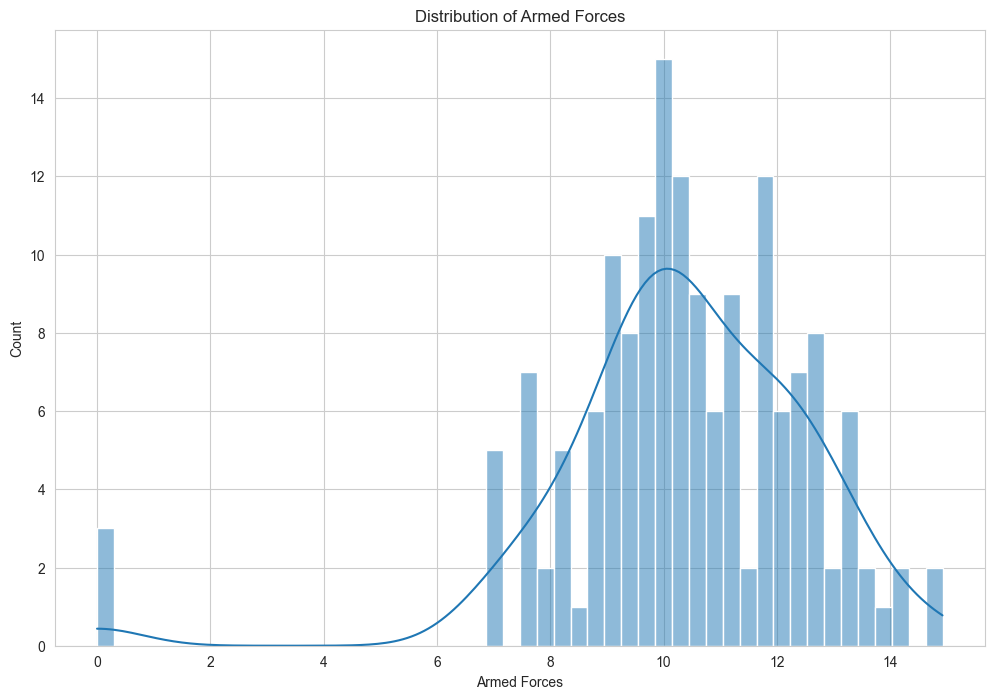

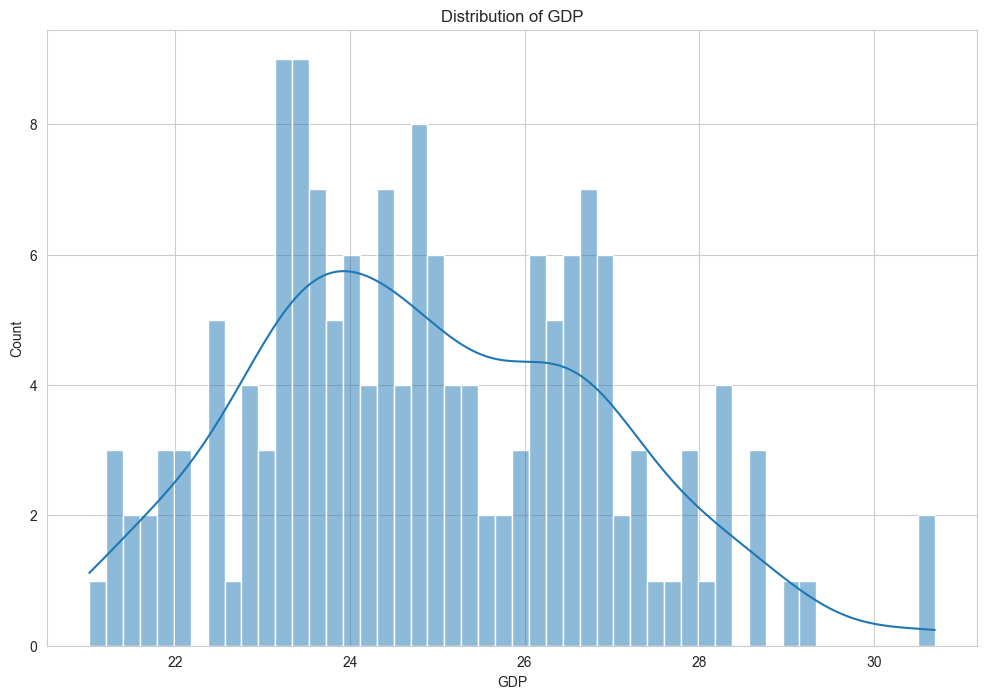

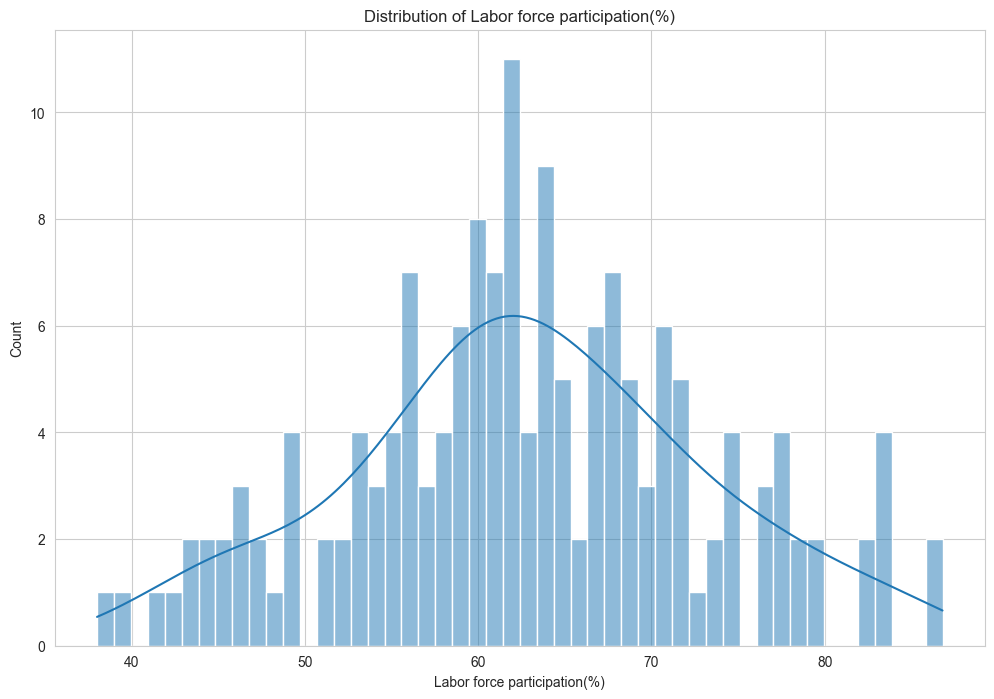

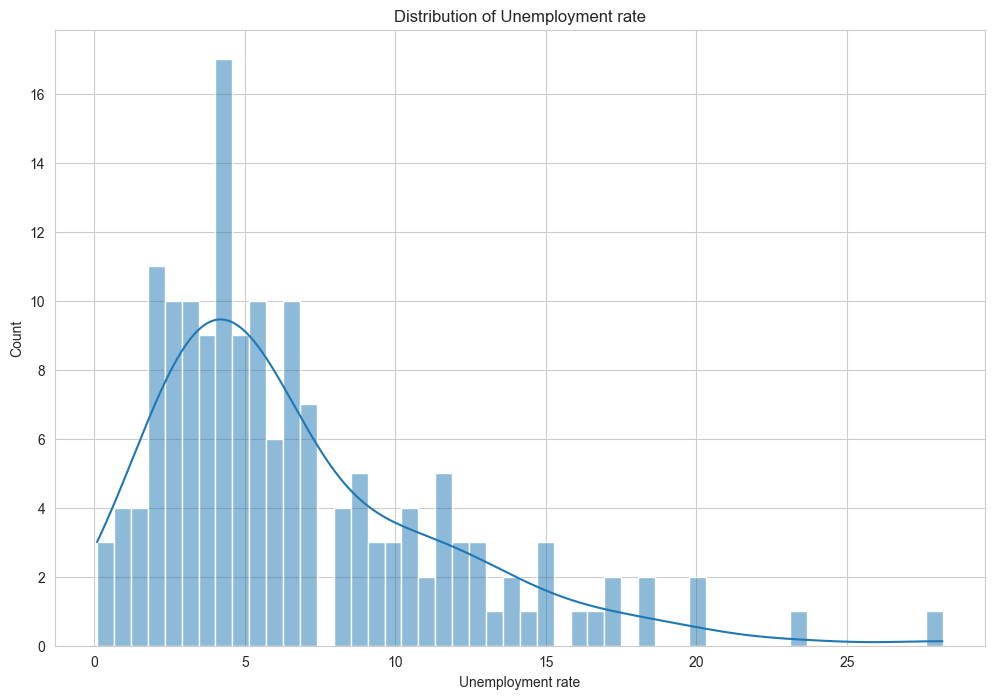

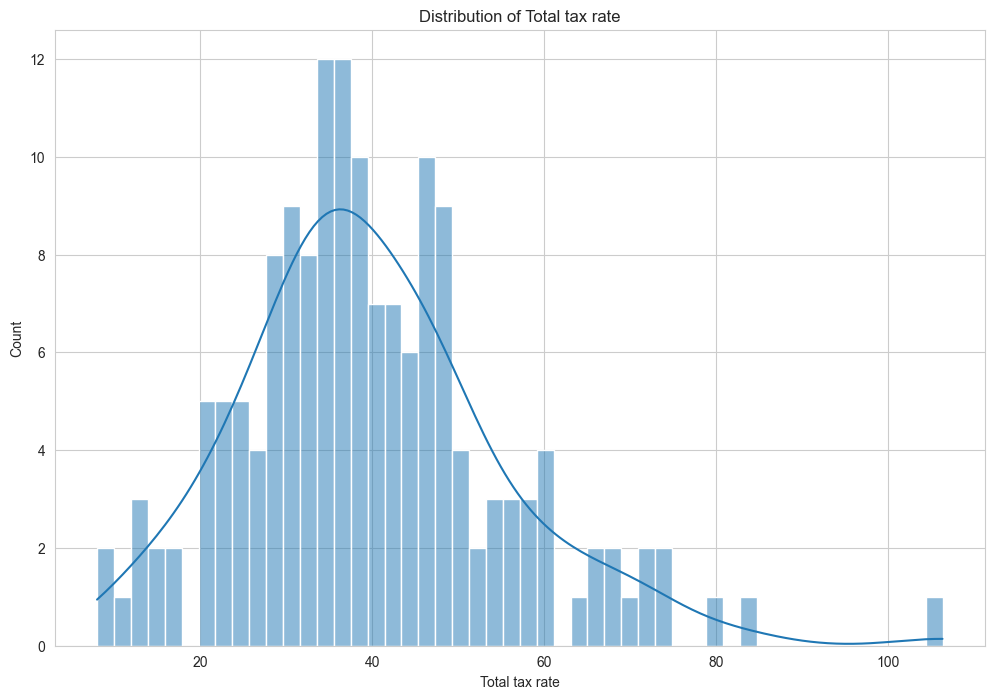

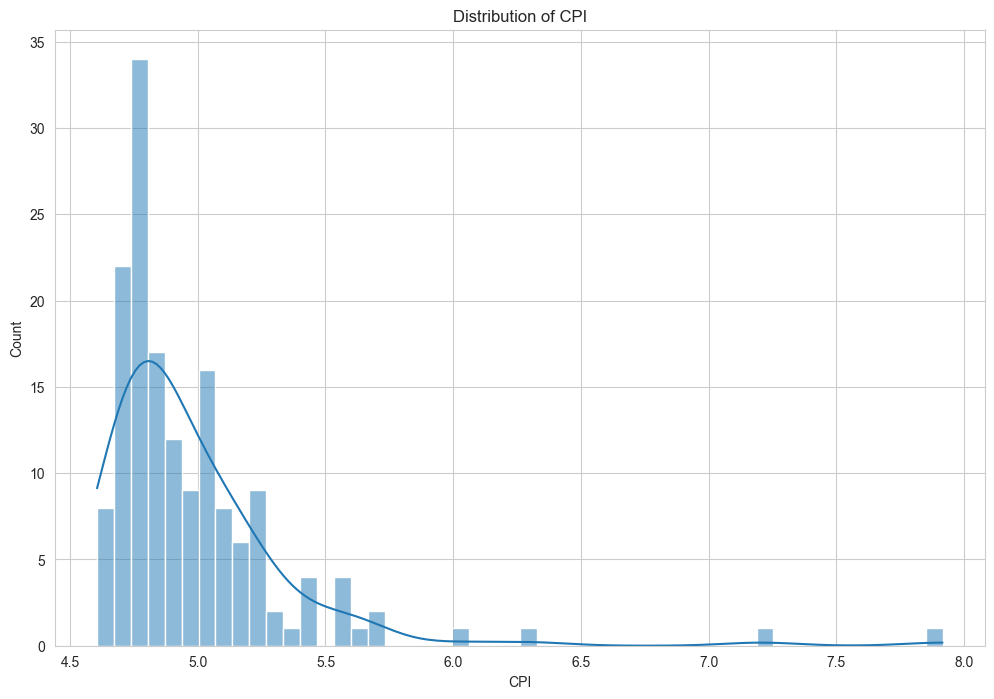

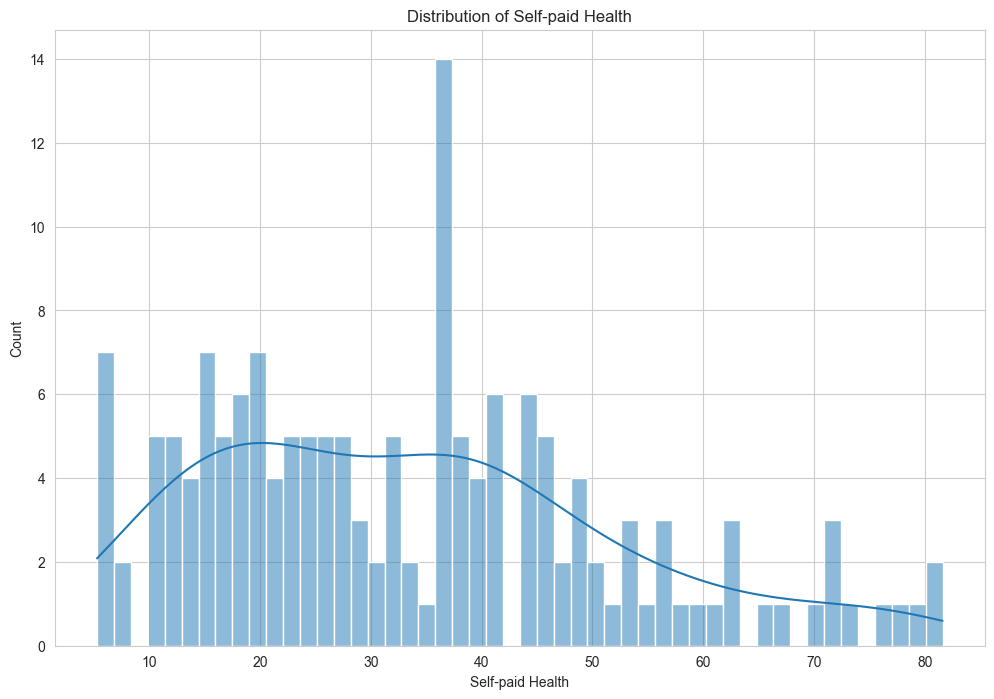

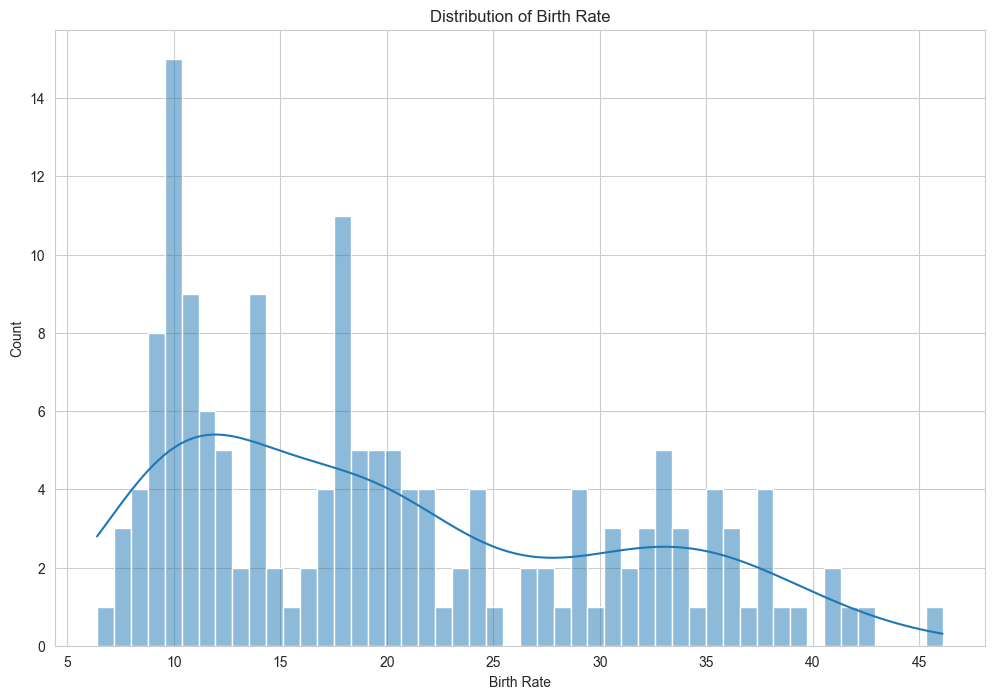

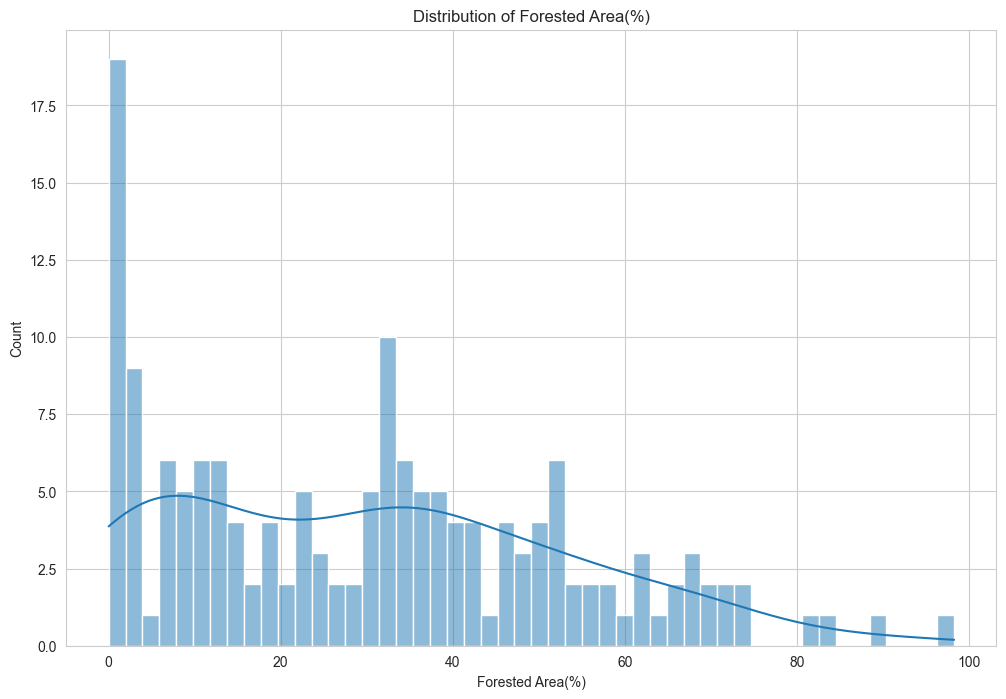

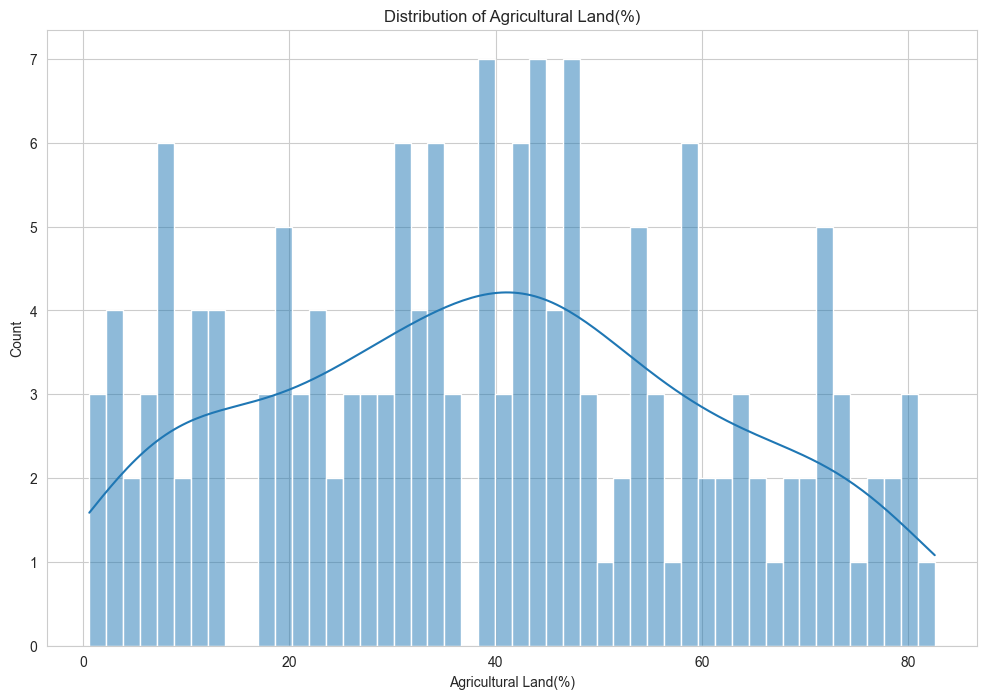

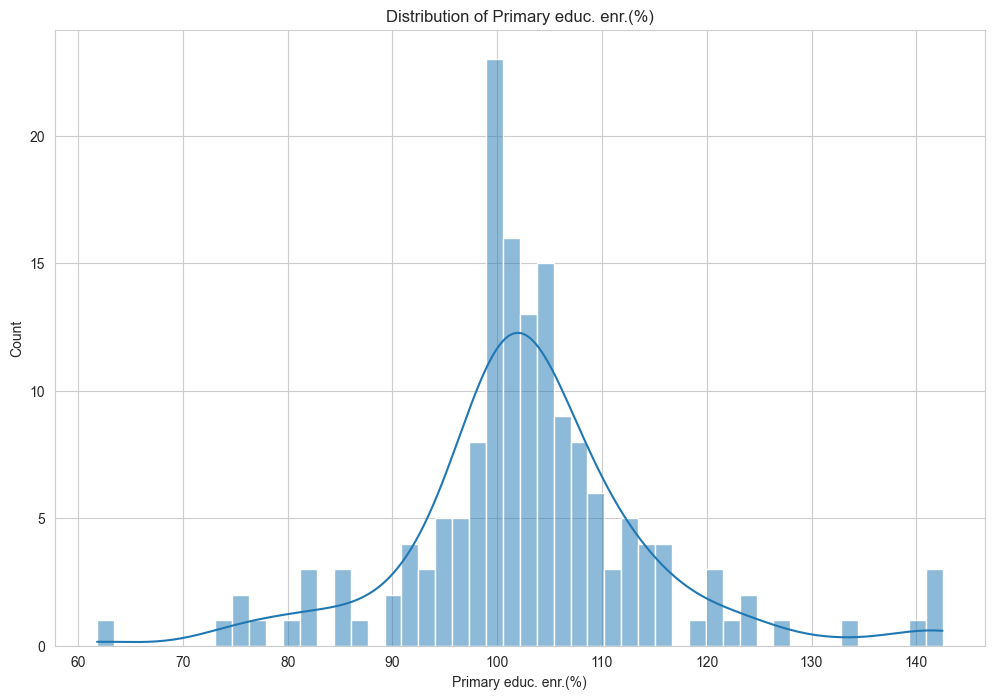

In [462]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

## data normalization

In [463]:
scaler = MinMaxScaler()

In [464]:
dataset_scaled = scaler.fit_transform(dataset.drop('Country',axis=1))

In [465]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns=dataset.drop('Country',axis=1).columns)

In [466]:
dataset_scaled

Density(P/Km2)  Armed Forces       GDP  Labor force participation(%)  \
0          0.379738      0.849978  0.274477                      0.223361   
1          0.449396      0.610081  0.251404                      0.362705   
2          0.232692      0.848721  0.500313                      0.065574   
3          0.276991      0.781937  0.439804                      0.809426   
4          0.225876      0.774686  0.600811                      0.477459   
..              ...           ...       ...                           ...   
154        0.302288      0.854003  0.608063                      0.444672   
155        0.586697      0.882141  0.544976                      0.807377   
156        0.371188      0.710022  0.309903                      0.000000   
157        0.272233      0.648629  0.293956                      0.750000   
158        0.323348      0.726300  0.286413                      0.924180   

     Unemployment rate  Total tax rate       CPI  Self-paid Health  \
0             0.392666        0.644964  0.124187          0.958060   
1             0.435742        0.290946  0.055106          0.676278   
2             0.413314        0.591048  0.127096          0.298820   
3             0.242079        0.418108  0.291677          0.368283   
4             0.345319        1.000000  0.256375          0.161206   
..                 ...             ...       ...               ...   
154           0.310075        0.664293  1.000000          0.530799   
155           0.068352        0.301119  0.150289          0.500655   
156           0.456390        0.189217  0.139181          0.992136   
157           0.403702        0.077314  0.228736          0.290957   
158           0.173015        0.240081  0.018959          0.268676   

     Birth Rate  Forested Area(%)  Agricultural Land(%)  Primary educ. enr.(%)  
0      0.657510          0.021363              0.701220               0.522924  
1      0.135585          0.285860              0.518293               0.560099  
2      0.450605          0.008138              0.204878               0.596035  
3      0.865171          0.471007              0.571951               0.640644  
4      0.267641          0.099695              0.654878               0.593556  
..          ...               ...                   ...                    ...  
154    0.289315          0.536114              0.291463               0.438662  
155    0.260837          0.489318              0.471951               0.604709  
156    0.606099          0.010173              0.536585               0.394052  
157    0.750756          0.663276              0.384146               0.457249  
158    0.611895          0.361139              0.503659               0.596035  

[159 rows x 12 columns]

In [467]:
dataset_scaled.insert(0,'Country',dataset['Country'].values)

In [468]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.274477   
1        Albania        0.449396      0.610081  0.251404   
2        Algeria        0.232692      0.848721  0.500313   
3         Angola        0.276991      0.781937  0.439804   
4      Argentina        0.225876      0.774686  0.600811   
..           ...             ...           ...       ...   
154    Venezuela        0.302288      0.854003  0.608063   
155      Vietnam        0.586697      0.882141  0.544976   
156        Yemen        0.371188      0.710022  0.309903   
157       Zambia        0.272233      0.648629  0.293956   
158     Zimbabwe        0.323348      0.726300  0.286413   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
154                      0.444672           0.310075        0.664293   
155                      0.807377           0.068352        0.301119   
156                      0.000000           0.456390        0.189217   
157                      0.750000           0.403702        0.077314   
158                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
154  1.000000          0.530799    0.289315          0.536114   
155  0.150289          0.500655    0.260837          0.489318   
156  0.139181          0.992136    0.606099          0.010173   
157  0.228736          0.290957    0.750756          0.663276   
158  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)  
0                0.701220               0.522924  
1                0.518293               0.560099  
2                0.204878               0.596035  
3                0.571951               0.640644  
4                0.654878               0.593556  
..                    ...                    ...  
154              0.291463               0.438662  
155              0.471951               0.604709  
156              0.536585               0.394052  
157              0.384146               0.457249  
158              0.503659               0.596035  

[159 rows x 13 columns]

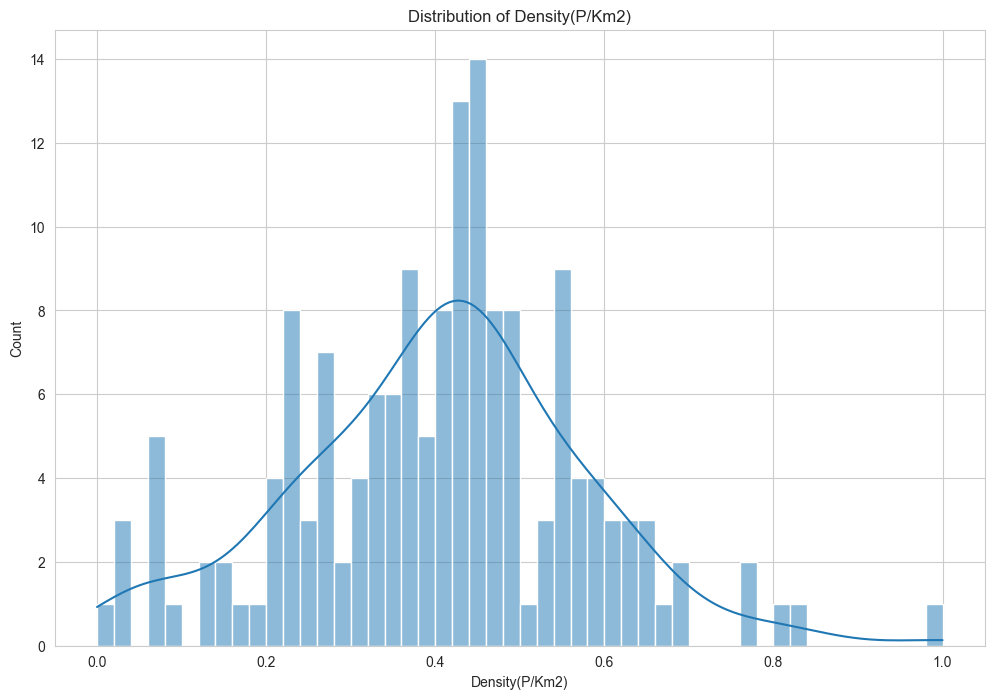

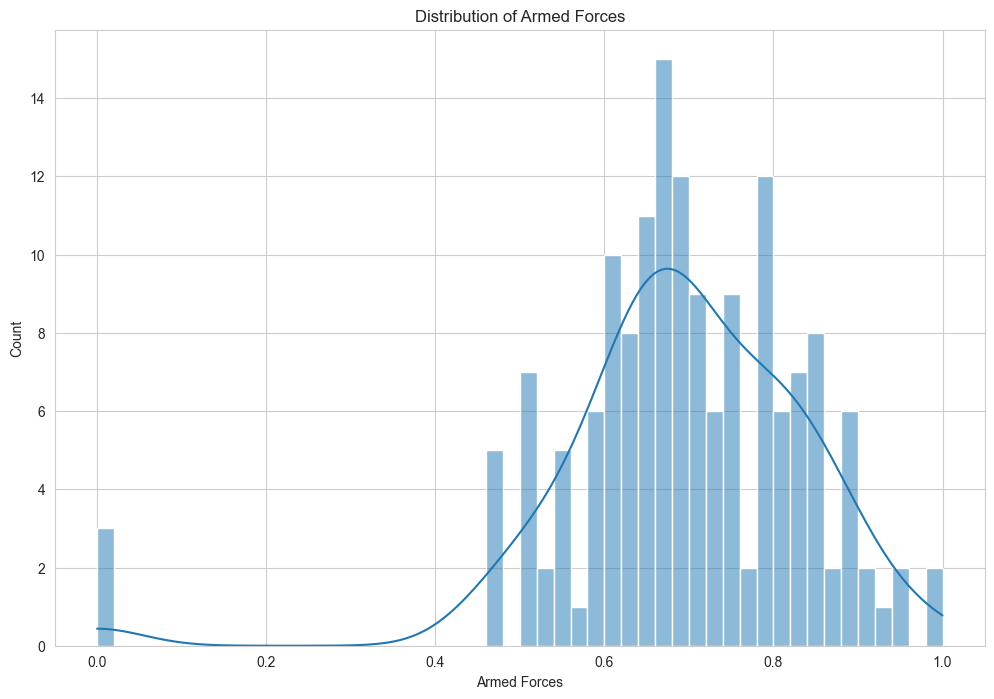

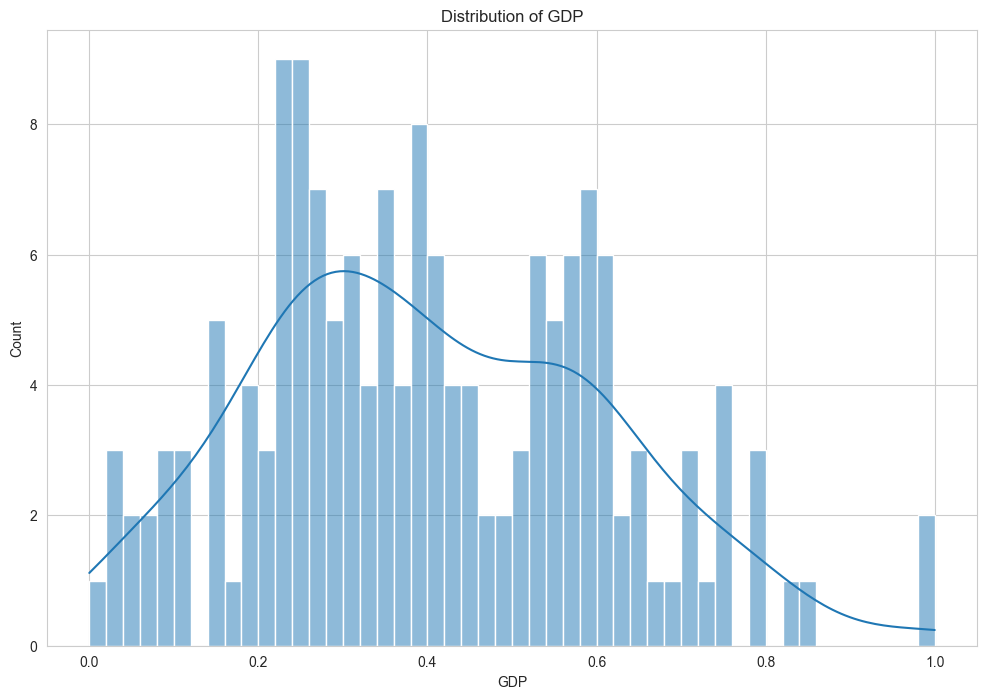

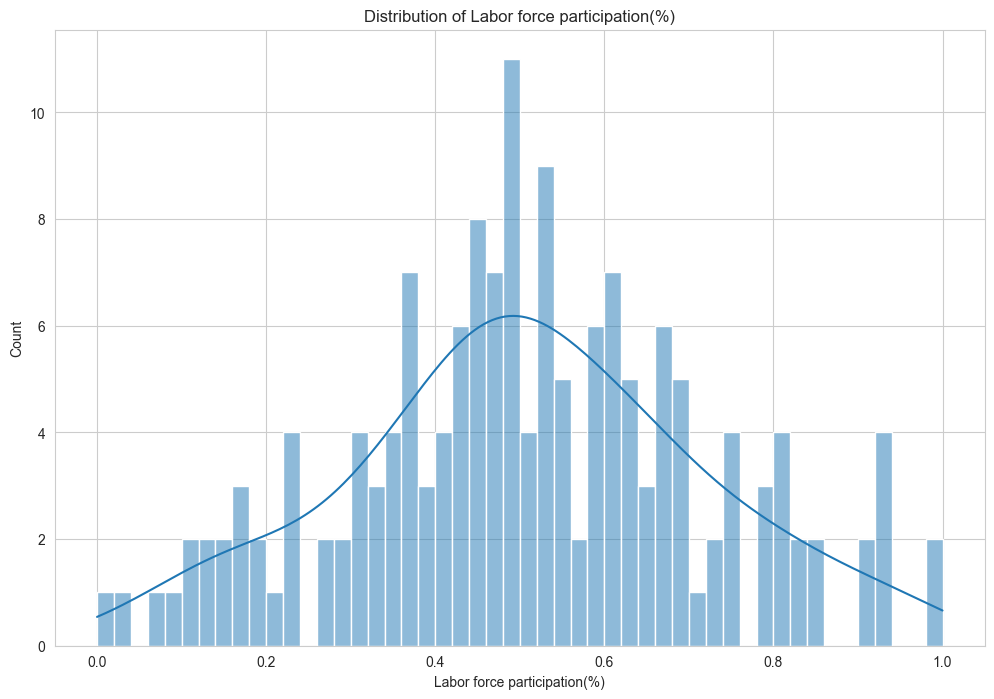

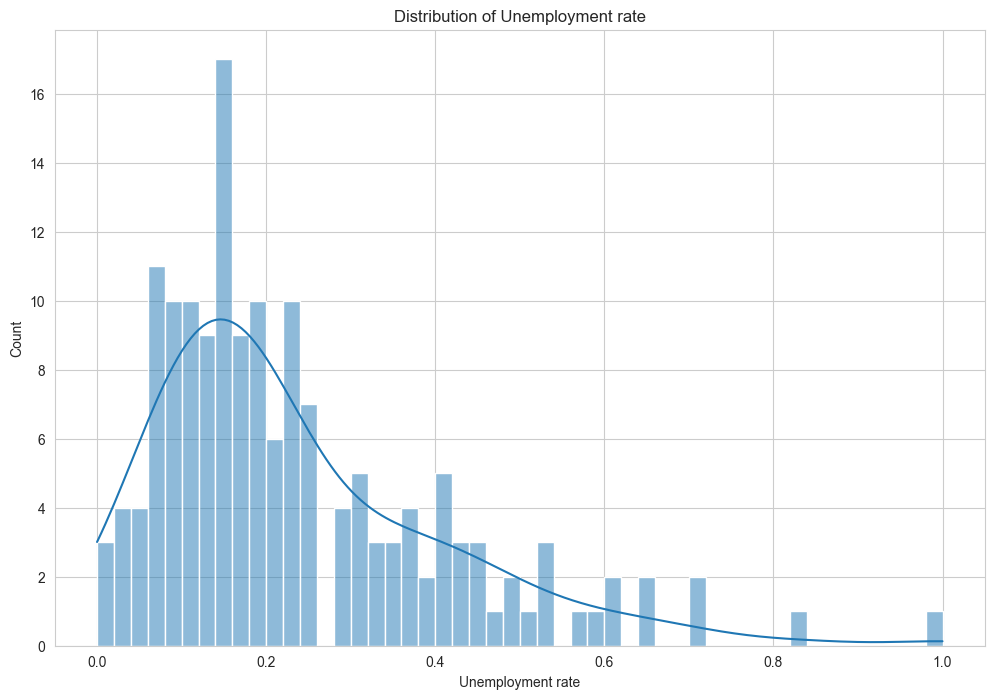

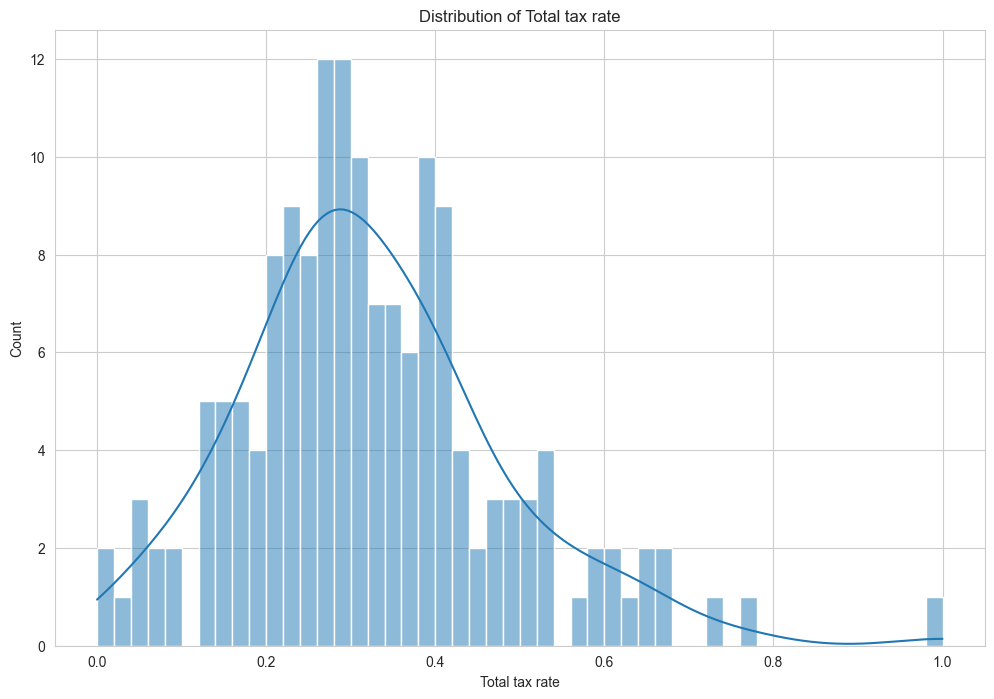

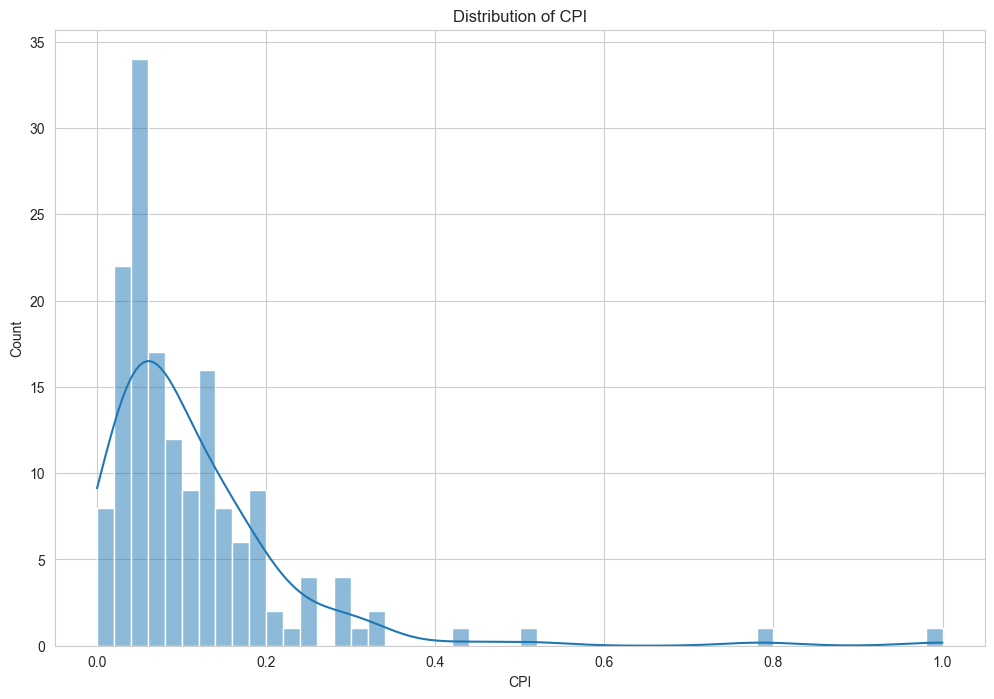

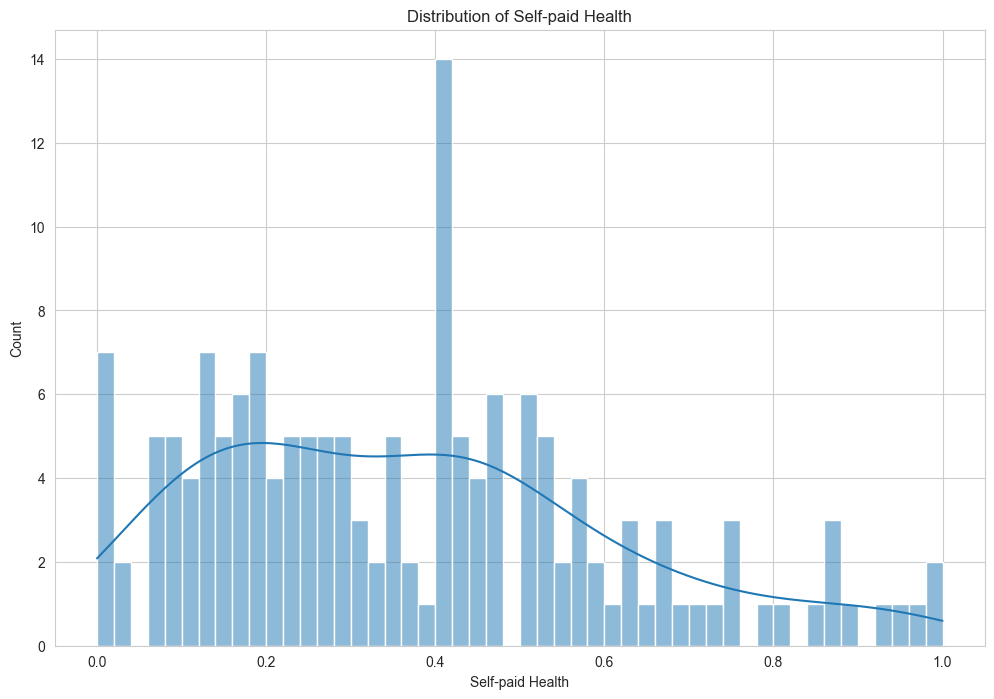

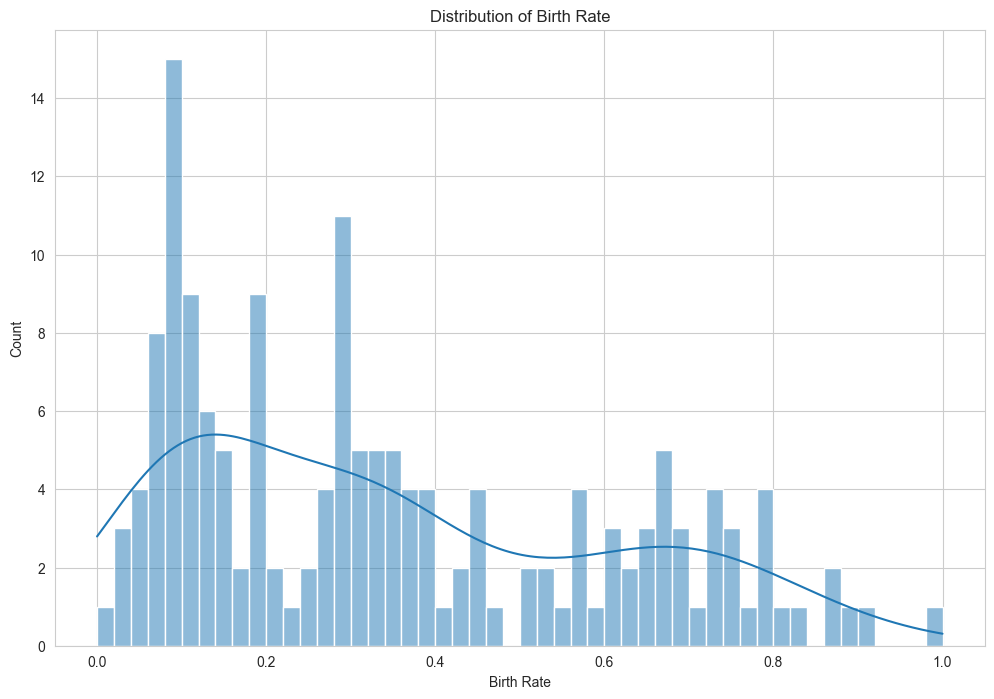

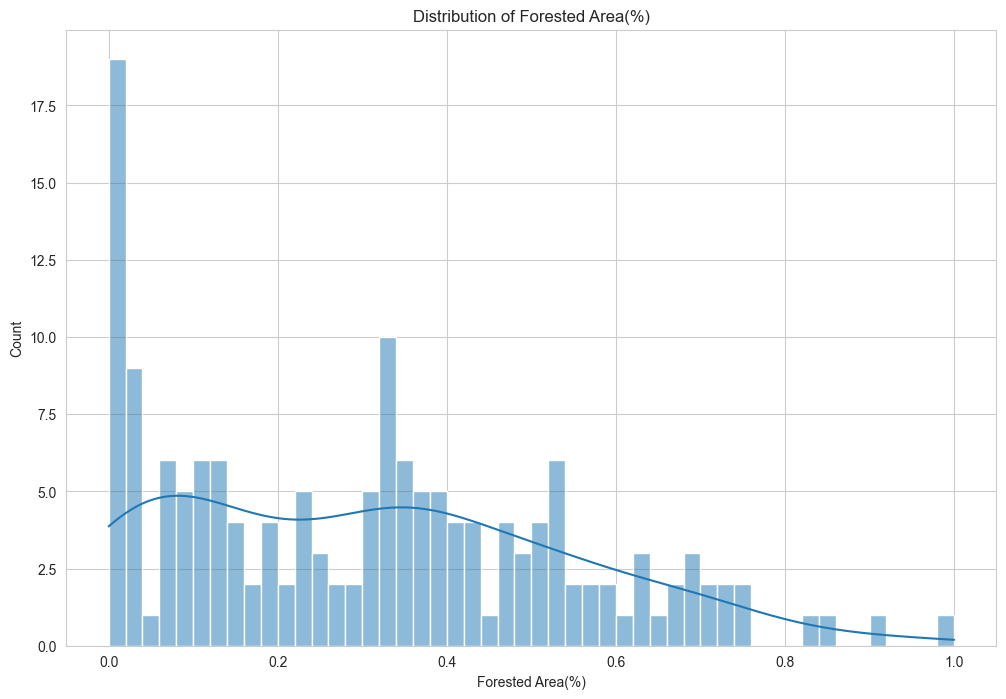

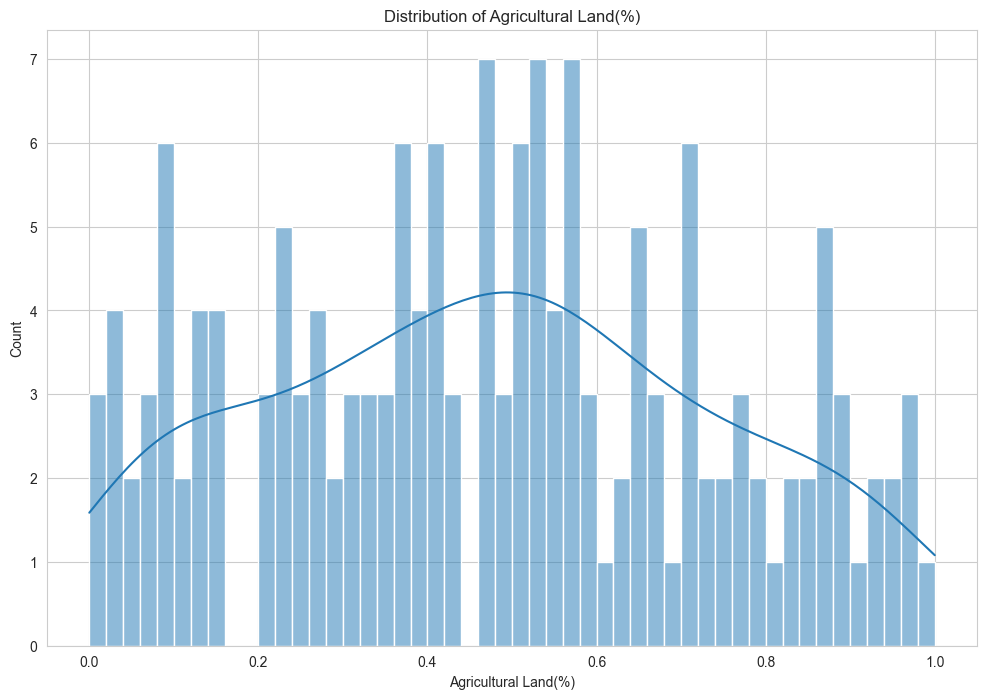

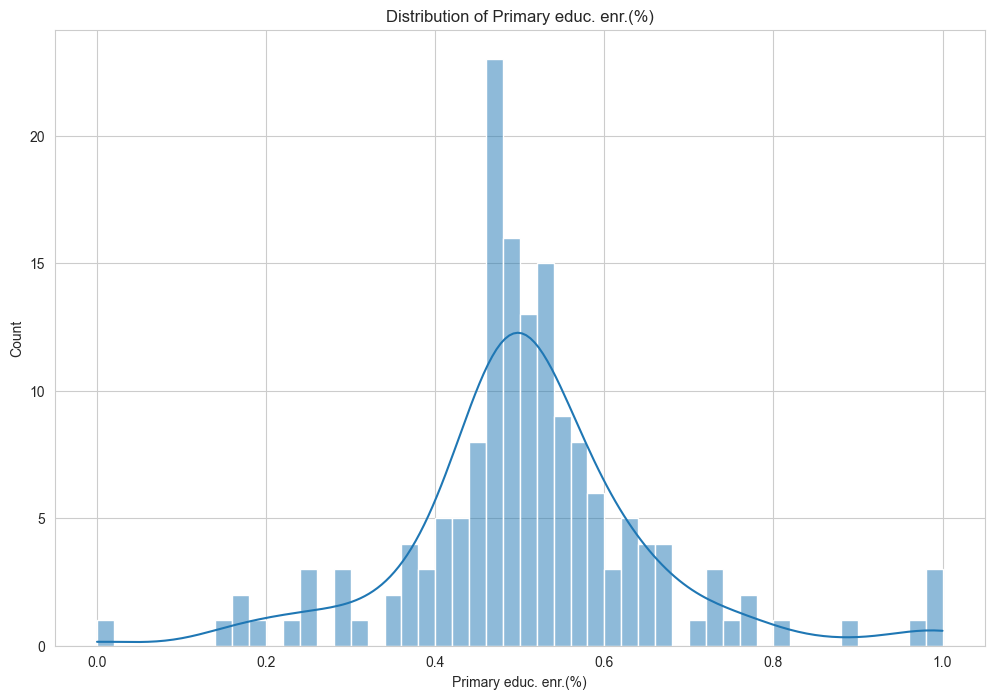

In [469]:
for i in dataset_scaled.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset_scaled[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

## plots

In [470]:
dataset_scaled.head()

Country  Density(P/Km2)  Armed Forces       GDP  \
0  Afghanistan        0.379738      0.849978  0.274477   
1      Albania        0.449396      0.610081  0.251404   
2      Algeria        0.232692      0.848721  0.500313   
3       Angola        0.276991      0.781937  0.439804   
4    Argentina        0.225876      0.774686  0.600811   

   Labor force participation(%)  Unemployment rate  Total tax rate       CPI  \
0                      0.223361           0.392666        0.644964  0.124187   
1                      0.362705           0.435742        0.290946  0.055106   
2                      0.065574           0.413314        0.591048  0.127096   
3                      0.809426           0.242079        0.418108  0.291677   
4                      0.477459           0.345319        1.000000  0.256375   

   Self-paid Health  Birth Rate  Forested Area(%)  Agricultural Land(%)  \
0          0.958060    0.657510          0.021363              0.701220   
1          0.676278    0.135585          0.285860              0.518293   
2          0.298820    0.450605          0.008138              0.204878   
3          0.368283    0.865171          0.471007              0.571951   
4          0.161206    0.267641          0.099695              0.654878   

   Primary educ. enr.(%)  
0               0.522924  
1               0.560099  
2               0.596035  
3               0.640644  
4               0.593556

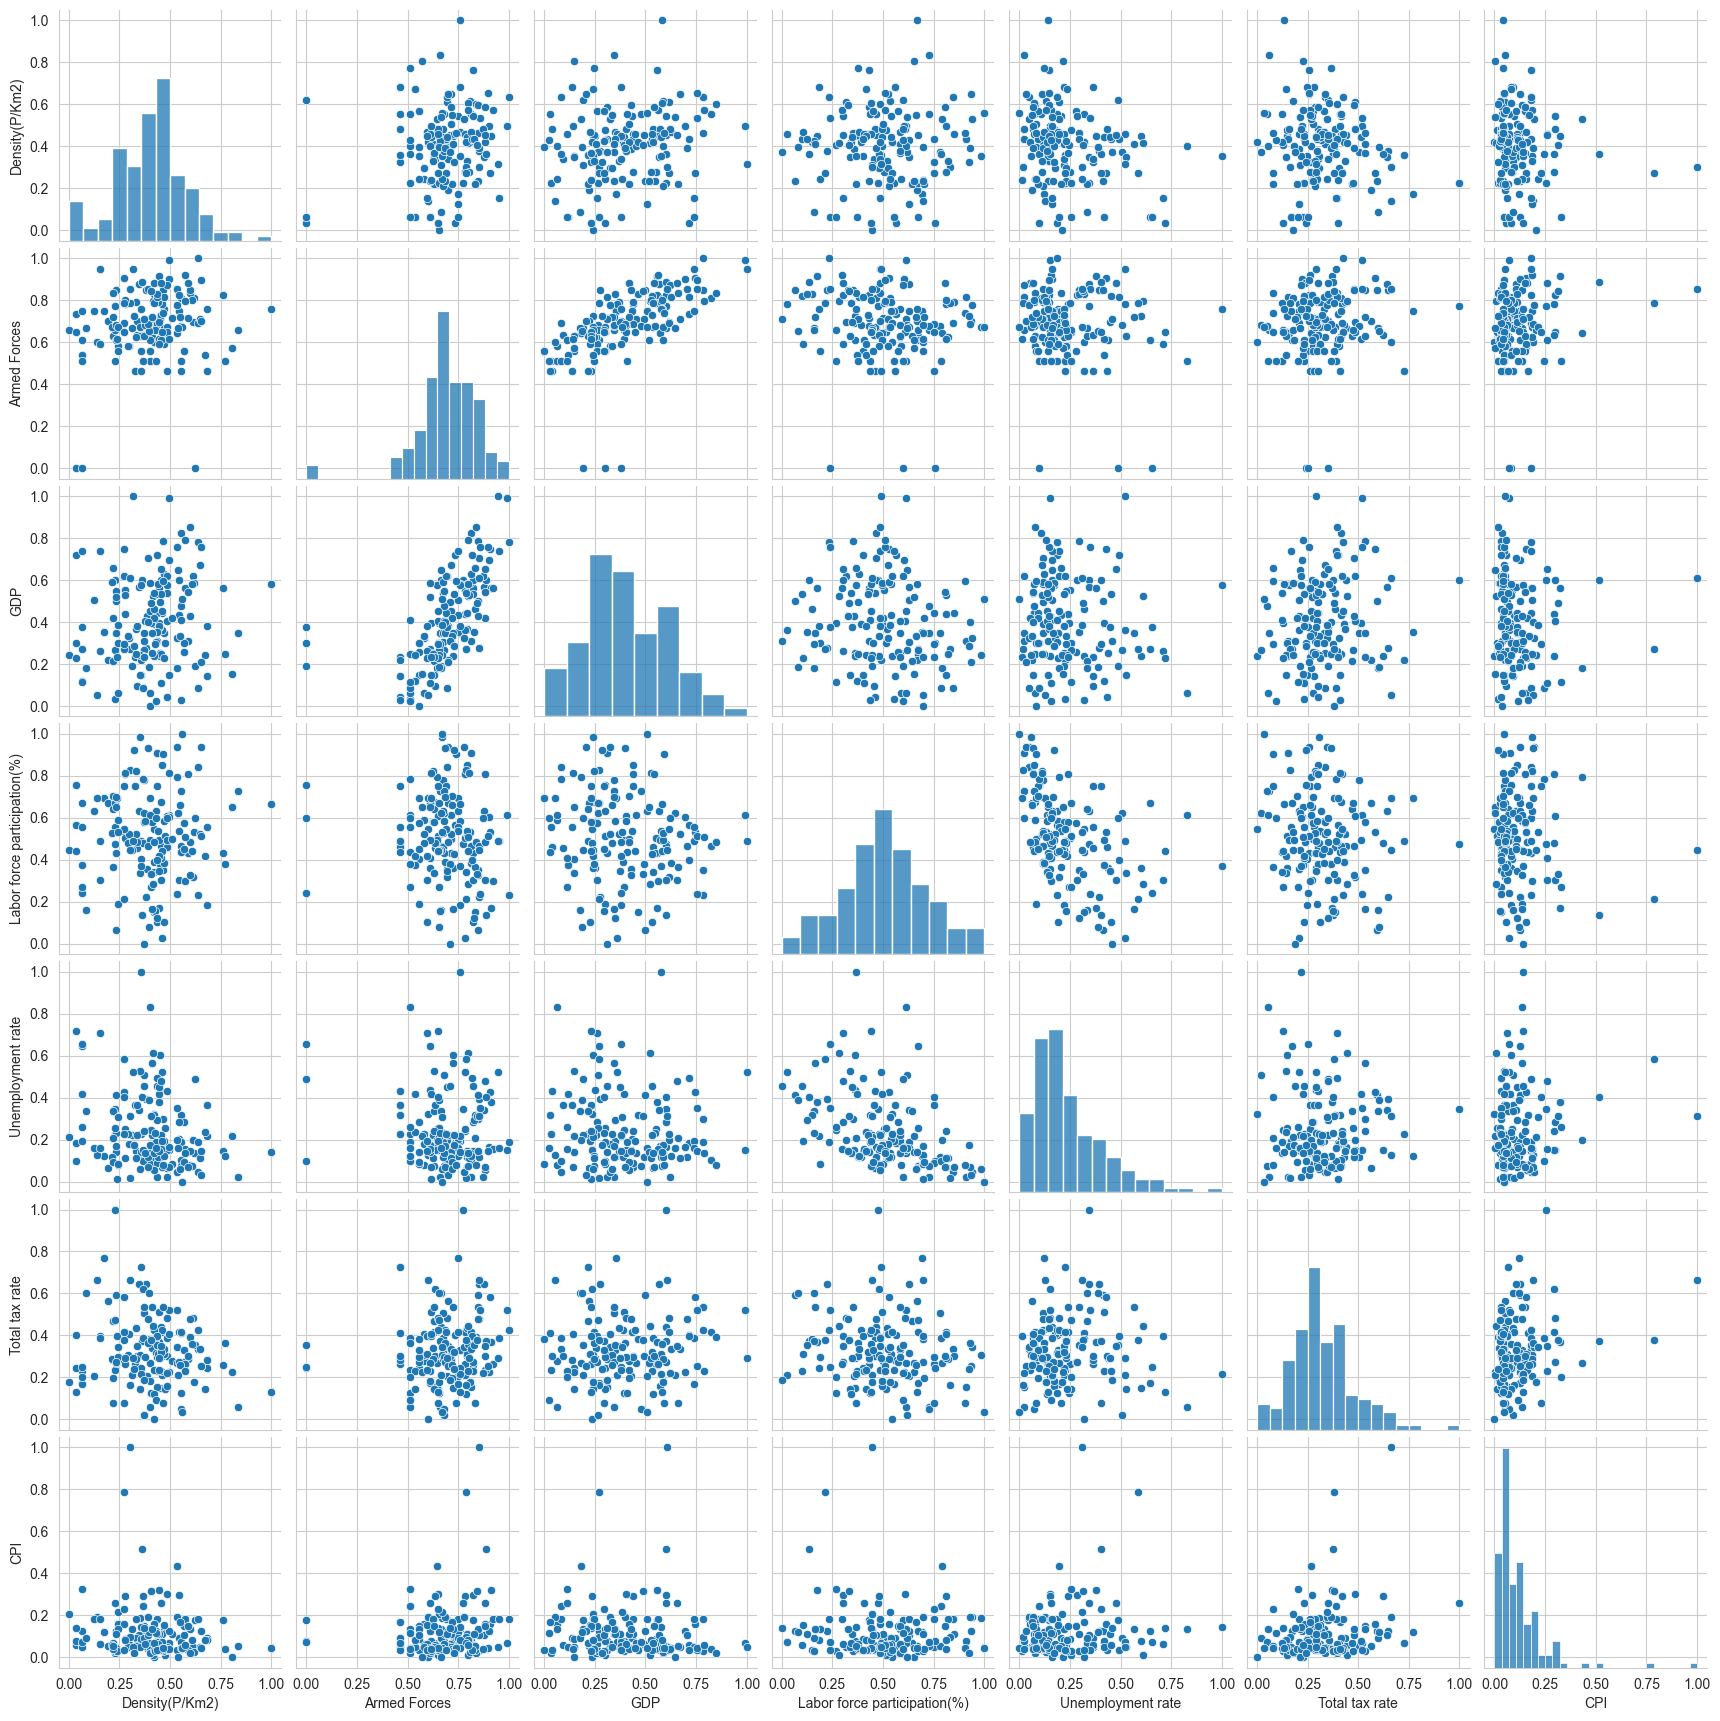

In [471]:
sns.pairplot(dataset_scaled.loc[:,'Density(P/Km2)':'CPI']) # pairplot economic variables
plt.show()

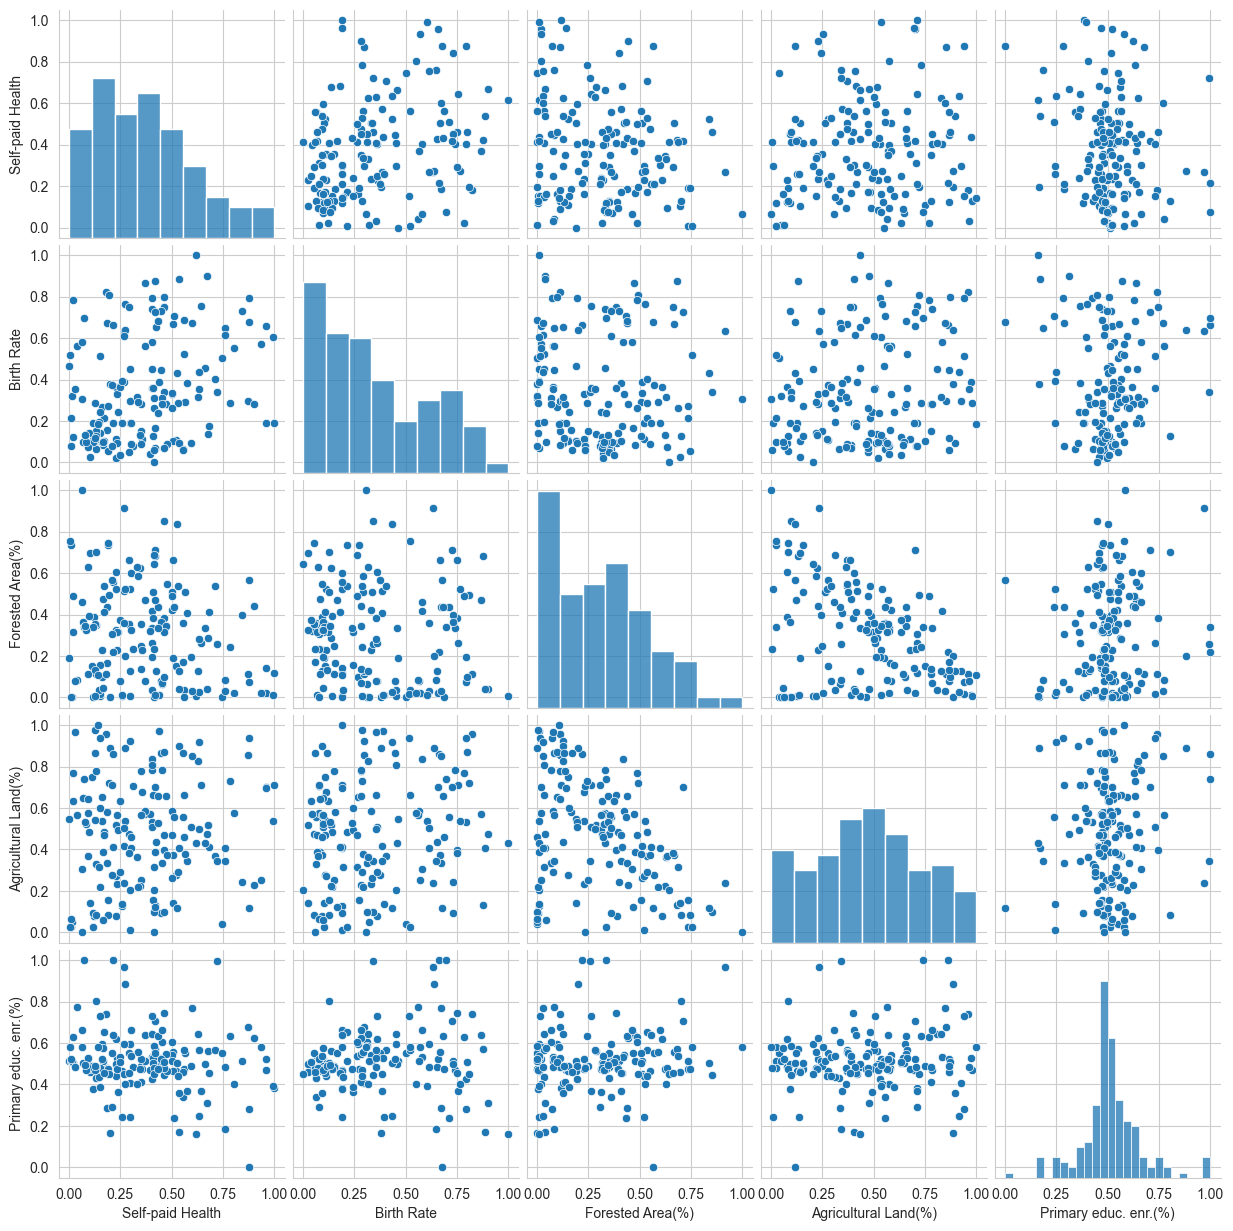

In [472]:
sns.pairplot(dataset_scaled.loc[:,'Self-paid Health':'Primary educ. enr.(%)']) # non economic variable
plt.show()

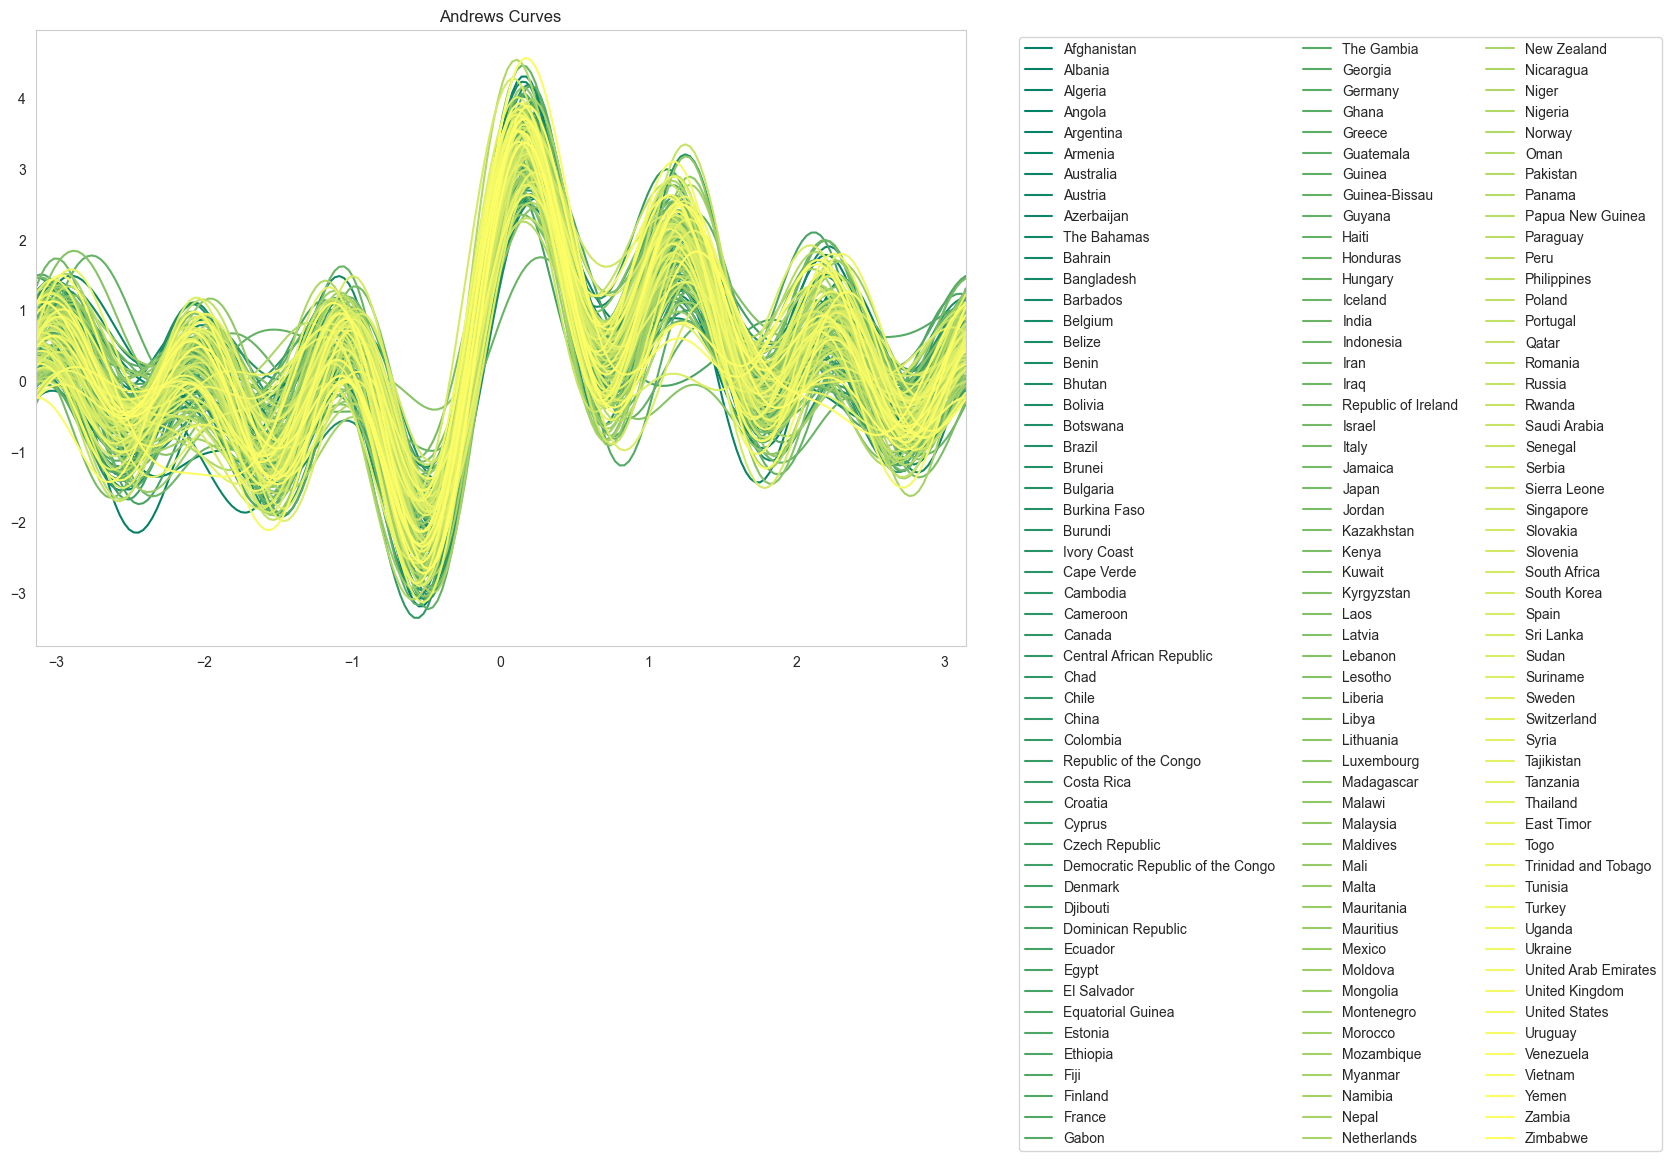

In [473]:
plt.figure(figsize=(12,8))
andrews_curves(dataset_scaled,class_column="Country",colormap='summer')
plt.title("Andrews Curves")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',ncol=3)
plt.show()

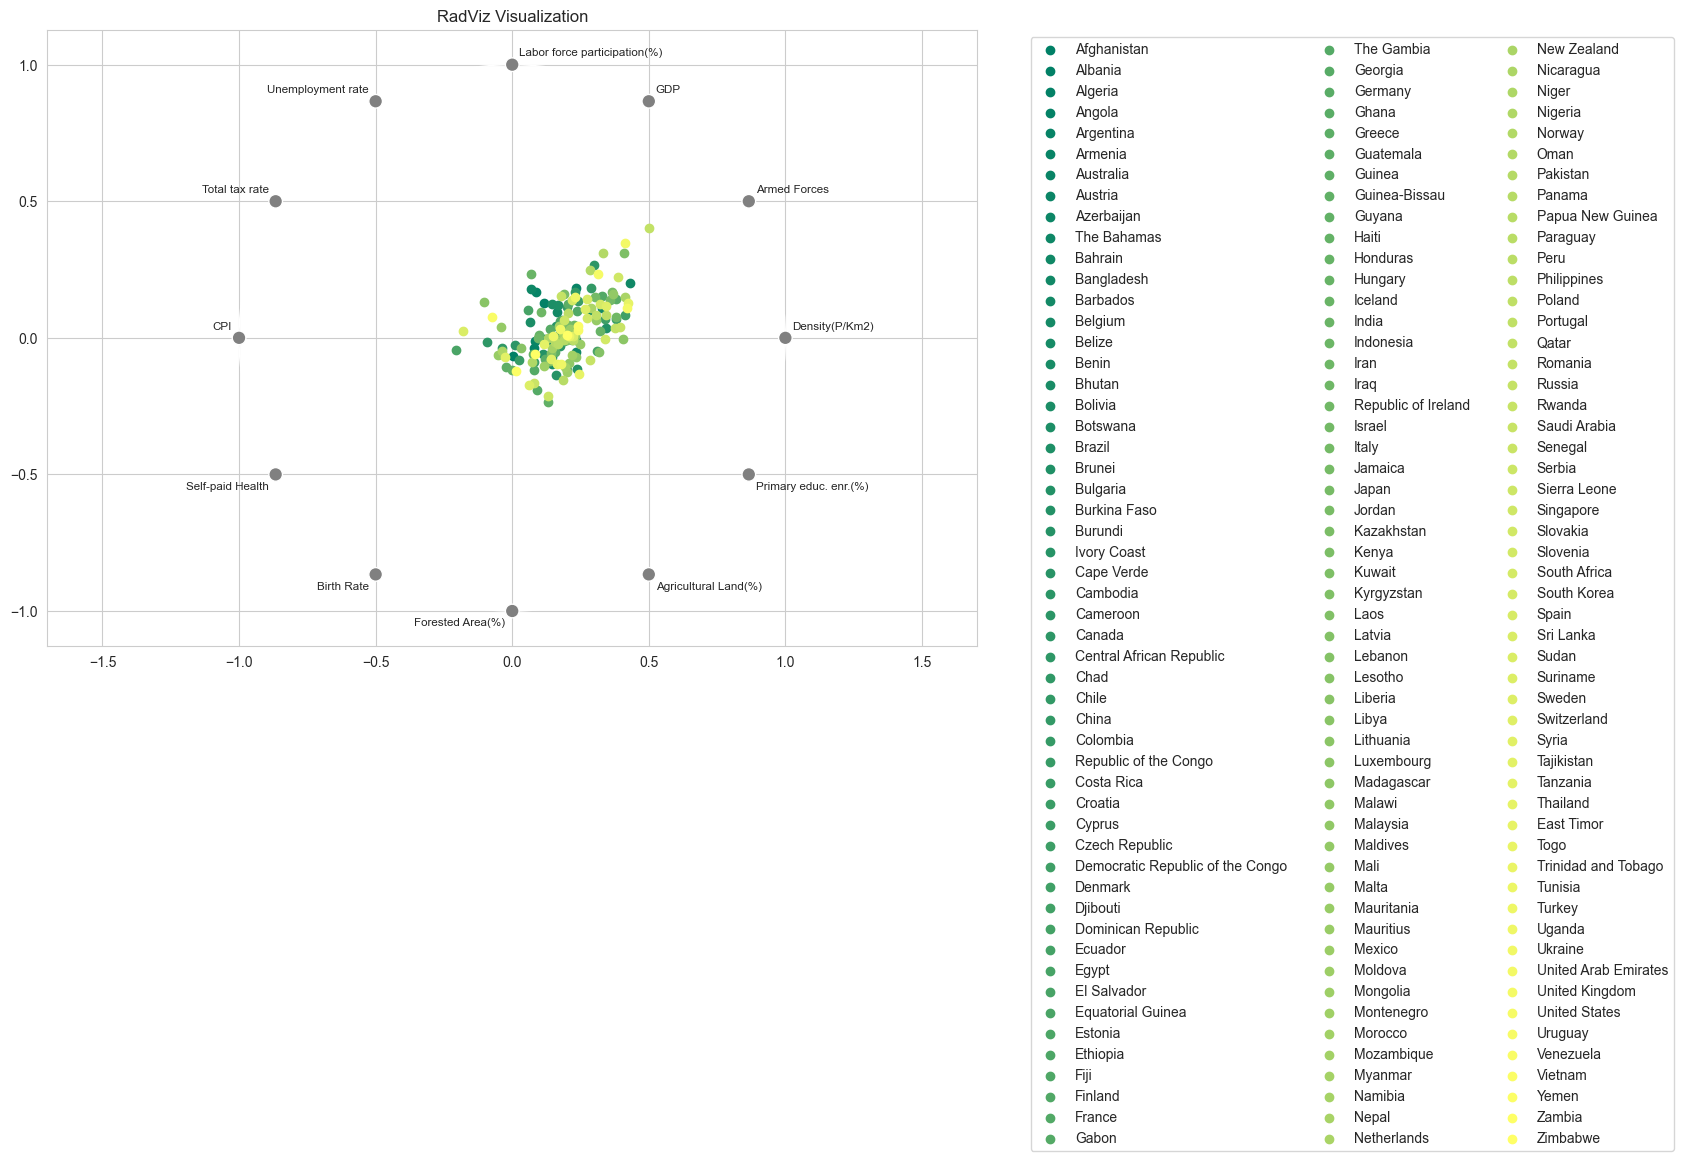

In [474]:
plt.figure(figsize=(12,8))
radviz(dataset_scaled,class_column="Country",colormap="summer")  
plt.title("RadViz Visualization")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',ncol=3)
plt.show()

## clustering

In [475]:
from sklearn.cluster import KMeans

In [476]:
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset_scaled.drop('Country',axis=1))
    inertia.append(kmeans.inertia_)

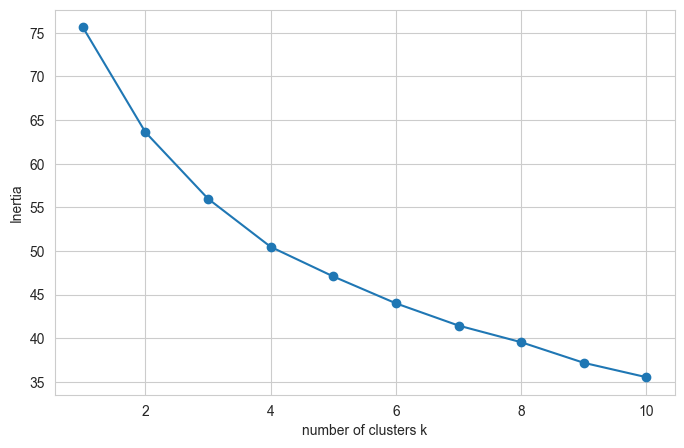

In [477]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("number of clusters k")
plt.ylabel("Inertia")
plt.show()

In [478]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters,random_state=42,n_init=10)
dataset_scaled["Cluster"] = kmeans.fit_predict(dataset_scaled.drop('Country',axis=1))

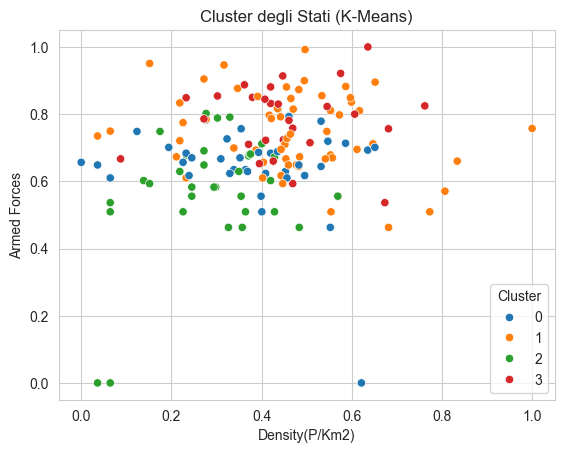

In [479]:
sns.scatterplot(x=dataset_scaled.drop('Country',axis=1).iloc[:, 0], y=dataset_scaled.drop('Country',axis=1).iloc[:, 1], hue=dataset_scaled.drop('Country',axis=1)["Cluster"], palette="tab10")
plt.title("Cluster degli Stati (K-Means)")
plt.show()

## plots after clustering

In [480]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.274477   
1        Albania        0.449396      0.610081  0.251404   
2        Algeria        0.232692      0.848721  0.500313   
3         Angola        0.276991      0.781937  0.439804   
4      Argentina        0.225876      0.774686  0.600811   
..           ...             ...           ...       ...   
154    Venezuela        0.302288      0.854003  0.608063   
155      Vietnam        0.586697      0.882141  0.544976   
156        Yemen        0.371188      0.710022  0.309903   
157       Zambia        0.272233      0.648629  0.293956   
158     Zimbabwe        0.323348      0.726300  0.286413   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
154                      0.444672           0.310075        0.664293   
155                      0.807377           0.068352        0.301119   
156                      0.000000           0.456390        0.189217   
157                      0.750000           0.403702        0.077314   
158                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
154  1.000000          0.530799    0.289315          0.536114   
155  0.150289          0.500655    0.260837          0.489318   
156  0.139181          0.992136    0.606099          0.010173   
157  0.228736          0.290957    0.750756          0.663276   
158  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)  Cluster  
0                0.701220               0.522924        3  
1                0.518293               0.560099        3  
2                0.204878               0.596035        3  
3                0.571951               0.640644        0  
4                0.654878               0.593556        1  
..                    ...                    ...      ...  
154              0.291463               0.438662        3  
155              0.471951               0.604709        1  
156              0.536585               0.394052        3  
157              0.384146               0.457249        2  
158              0.503659               0.596035        0  

[159 rows x 14 columns]

In [481]:
dataset_scaled['Cluster'] = dataset_scaled['Cluster'].replace({0:'medium_poor',
                                                              1:'rich',
                                                              2:'poor',
                                                              3:'medium_rich'})

In [482]:
dataset_scaled

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.274477   
1        Albania        0.449396      0.610081  0.251404   
2        Algeria        0.232692      0.848721  0.500313   
3         Angola        0.276991      0.781937  0.439804   
4      Argentina        0.225876      0.774686  0.600811   
..           ...             ...           ...       ...   
154    Venezuela        0.302288      0.854003  0.608063   
155      Vietnam        0.586697      0.882141  0.544976   
156        Yemen        0.371188      0.710022  0.309903   
157       Zambia        0.272233      0.648629  0.293956   
158     Zimbabwe        0.323348      0.726300  0.286413   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
3                        0.809426           0.242079        0.418108   
4                        0.477459           0.345319        1.000000   
..                            ...                ...             ...   
154                      0.444672           0.310075        0.664293   
155                      0.807377           0.068352        0.301119   
156                      0.000000           0.456390        0.189217   
157                      0.750000           0.403702        0.077314   
158                      0.924180           0.173015        0.240081   

          CPI  Self-paid Health  Birth Rate  Forested Area(%)  \
0    0.124187          0.958060    0.657510          0.021363   
1    0.055106          0.676278    0.135585          0.285860   
2    0.127096          0.298820    0.450605          0.008138   
3    0.291677          0.368283    0.865171          0.471007   
4    0.256375          0.161206    0.267641          0.099695   
..        ...               ...         ...               ...   
154  1.000000          0.530799    0.289315          0.536114   
155  0.150289          0.500655    0.260837          0.489318   
156  0.139181          0.992136    0.606099          0.010173   
157  0.228736          0.290957    0.750756          0.663276   
158  0.018959          0.268676    0.611895          0.361139   

     Agricultural Land(%)  Primary educ. enr.(%)      Cluster  
0                0.701220               0.522924  medium_rich  
1                0.518293               0.560099  medium_rich  
2                0.204878               0.596035  medium_rich  
3                0.571951               0.640644  medium_poor  
4                0.654878               0.593556         rich  
..                    ...                    ...          ...  
154              0.291463               0.438662  medium_rich  
155              0.471951               0.604709         rich  
156              0.536585               0.394052  medium_rich  
157              0.384146               0.457249         poor  
158              0.503659               0.596035  medium_poor  

[159 rows x 14 columns]

In [483]:
medium_rich = dataset_scaled.loc[dataset_scaled['Cluster'] == 'medium_rich']

In [484]:
medium_rich

Country  Density(P/Km2)  Armed Forces       GDP  \
0    Afghanistan        0.379738      0.849978  0.274477   
1        Albania        0.449396      0.610081  0.251404   
2        Algeria        0.232692      0.848721  0.500313   
5        Armenia        0.448201      0.723620  0.239935   
8     Azerbaijan        0.469168      0.758120  0.348768   
11    Bangladesh        0.762057      0.824550  0.559881   
44         Egypt        0.446995      0.913697  0.560087   
58     Guatemala        0.507452      0.714868  0.418109   
66         India        0.635794      1.000000  0.782535   
68          Iran        0.362015      0.887207  0.599814   
69          Iraq        0.434250      0.820810  0.533372   
75        Jordan        0.460761      0.781361  0.360080   
82       Lebanon        0.681461      0.756465  0.380623   
94    Mauritania        0.087381      0.666849  0.179180   
95     Mauritius        0.673476      0.536484  0.243702   
97       Moldova        0.469168      0.593244  0.226069   
100      Morocco        0.420071      0.831731  0.463233   
102      Myanmar        0.420071      0.880975  0.417264   
109      Nigeria        0.545395      0.822706  0.600456   
112     Pakistan        0.575400      0.921268  0.560504   
117  Philippines        0.606643      0.799911  0.582546   
125      Senegal        0.425935      0.660143  0.296231   
135        Sudan        0.272233      0.785830  0.273395   
139        Syria        0.436904      0.829797  0.351878   
140   Tajikistan        0.395273      0.652691  0.186059   
146      Tunisia        0.409102      0.722238  0.347684   
149      Ukraine        0.407454      0.844355  0.489961   
154    Venezuela        0.302288      0.854003  0.608063   
156        Yemen        0.371188      0.710022  0.309903   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
0                        0.223361           0.392666        0.644964   
1                        0.362705           0.435742        0.290946   
2                        0.065574           0.413314        0.591048   
5                        0.360656           0.601638        0.148525   
8                        0.584016           0.192951        0.332655   
11                       0.430328           0.145959        0.258393   
44                       0.172131           0.379850        0.370295   
58                       0.497951           0.084372        0.276704   
66                       0.231557           0.187611        0.424212   
68                       0.137295           0.401922        0.373347   
69                       0.102459           0.453186        0.231943   
75                       0.026639           0.520826        0.209563   
82                       0.184426           0.218583        0.246185   
94                       0.161885           0.336775        0.600203   
95                       0.415984           0.234247        0.144456   
97                       0.104508           0.191527        0.312309   
100                      0.149590           0.317907        0.384537   
102                      0.485656           0.053044        0.236012   
109                      0.305328           0.285155        0.272635   
112                      0.299180           0.155215        0.263479   
117                      0.442623           0.073336        0.357070   
125                      0.157787           0.231755        0.374364   
135                      0.213115           0.585262        0.380468   
139                      0.125000           0.294767        0.353001   
140                      0.081967           0.389106        0.603255   
146                      0.165984           0.567106        0.536114   
149                      0.331967           0.312923        0.378433   
154                      0.444672           0.310075        0.664293   
156                      0.000000           0.456390        0.189217   

          CPI  Self-paid Health  Birth Rate  Fo

In [485]:
rich = dataset_scaled.loc[dataset_scaled['Cluster'] == 'rich']

In [486]:
rich

Country  Density(P/Km2)  Armed Forces       GDP  \
4               Argentina        0.225876      0.774686  0.600811   
6               Australia        0.036266      0.734918  0.717603   
7                 Austria        0.454066      0.666849  0.600039   
10                Bahrain        0.833991      0.660143  0.347087   
12               Barbados        0.681649      0.462917  0.140238   
13                Belgium        0.611666      0.695071  0.617717   
19                 Brazil        0.272233      0.904612  0.746365   
21               Bulgaria        0.387744      0.692944  0.429918   
28                 Canada        0.064397      0.749406  0.740394   
31                  Chile        0.276991      0.784741  0.552723   
32                  China        0.496483      0.992127  0.992411   
33               Colombia        0.346869      0.876660  0.566887   
35             Costa Rica        0.443305      0.617140  0.395736   
36                Croatia        0.404092      0.656521  0.393439   
37                 Cyprus        0.477050      0.648629  0.300465   
38         Czech Republic        0.484468      0.672944  0.538702   
40                Denmark        0.482654      0.644305  0.574356   
42     Dominican Republic        0.544839      0.748469  0.433393   
51                 France        0.465035      0.846574  0.786590   
55                Germany        0.552940      0.810801  0.822537   
57                 Greece        0.417033      0.796773  0.522078   
64                Hungary        0.451753      0.710022  0.494680   
67              Indonesia        0.494835      0.899463  0.695017   
70    Republic of Ireland        0.402377      0.610081  0.585759   
71                 Israel        0.617127      0.810052  0.587446   
72                  Italy        0.533768      0.854780  0.755058   
73                Jamaica        0.569118      0.555754  0.259090   
74                  Japan        0.599256      0.835697  0.851332   
78                 Kuwait        0.552940      0.678531  0.476321   
86              Lithuania        0.338554      0.699133  0.382260   
87             Luxembourg        0.553982      0.509327  0.410270   
90               Malaysia        0.442051      0.792019  0.579176   
91               Maldives        0.806632      0.570702  0.150073   
93                  Malta        0.773018      0.509327  0.248023   
96                 Mexico        0.391565      0.852622  0.707119   
105           Netherlands        0.647192      0.711677  0.673534   
106           New Zealand        0.232692      0.610081  0.520629   
110                Norway        0.211028      0.672944  0.589578   
111                  Oman        0.218671      0.720828  0.418476   
118                Poland        0.470181      0.814775  0.629251   
119              Portugal        0.456337      0.727601  0.534945   
120                 Qatar        0.557057      0.669966  0.508196   
121               Romania        0.421563      0.786902  0.540195   
122                Russia        0.151778      0.950780  0.738196   
124          Saudi Arabia        0.218671      0.833346  0.659418   
126                Serbia        0.443305      0.695071  0.376762   
128             Singapore        1.000000      0.757298  0.581240   
129              Slovakia        0.459669      0.648629  0.450955   
130              Slovenia        0.446995      0.593244  0.381347   
132           South Korea        0.651812      0.895165  0.756481   
133                 Spain        0.435584      0.816507  0.717710   
134             Sri Lanka        0.597064      0.848721  0.427498   
138           Switzerland        0.541447      0.666849  0.646989   
142              Thailand        0.482654      0.872936  0.620420   
147                Turkey        0.455207      0.880845  0.654268   
150  United Arab Emirates        0.463980      0.740459  0.594041   
151        United Kingdom        0.572746      0.797685  0.790750   
152         Unit

In [487]:
medium_poor = dataset_scaled.loc[dataset_scaled['Cluster'] == 'medium_poor']

In [488]:
medium_poor

Country  Density(P/Km2)  Armed Forces       GDP  \
3           Angola        0.276991      0.781937  0.439804   
15           Benin        0.452914      0.629355  0.245222   
18        Botswana        0.064397      0.610081  0.270278   
22    Burkina Faso        0.409102      0.623525  0.254519   
23         Burundi        0.635523      0.692944  0.083657   
24     Ivory Coast        0.420071      0.683688  0.390625   
30            Chad        0.194195      0.701075  0.220380   
41        Djibouti        0.338554      0.634718  0.093664   
45     El Salvador        0.586296      0.713291  0.310318   
48        Ethiopia        0.460761      0.792998  0.441399   
53      The Gambia        0.552416      0.462917  0.028361   
56           Ghana        0.482654      0.648629  0.404101   
59          Guinea        0.364372      0.634718  0.239310   
60   Guinea-Bissau        0.398875      0.555754  0.000000   
62           Haiti        0.621453      0.000000  0.190815   
76      Kazakhstan        0.123647      0.748469  0.506318   
77           Kenya        0.435584      0.688475  0.440747   
79      Kyrgyzstan        0.309706      0.666849  0.190274   
83         Lesotho        0.400638      0.509327  0.062734   
88      Madagascar        0.352123      0.669966  0.242996   
89          Malawi        0.531928      0.644305  0.180167   
92            Mali        0.225876      0.656521  0.265492   
98        Mongolia        0.000000      0.656521  0.241287   
101     Mozambique        0.329652      0.623525  0.249052   
103        Namibia        0.036266      0.648629  0.229561   
104          Nepal        0.531928      0.779010  0.323302   
107      Nicaragua        0.368956      0.629355  0.230843   
108          Niger        0.239158      0.617140  0.234150   
115       Paraguay        0.232692      0.683688  0.345932   
123         Rwanda        0.651333      0.701075  0.208875   
127   Sierra Leone        0.456337      0.610081  0.111431   
131   South Africa        0.354670      0.756465  0.575347   
141       Tanzania        0.393432      0.686124  0.398057   
144           Togo        0.495661      0.617140  0.145099   
148         Uganda        0.547050      0.719387  0.335217   
153        Uruguay        0.245309      0.669966  0.385683   
158       Zimbabwe        0.323348      0.726300  0.286413   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
3                        0.809426           0.242079        0.418108   
15                       0.674180           0.076184        0.416073   
18                       0.672131           0.644357        0.173957   
22                       0.581967           0.219651        0.338759   
23                       0.844262           0.047704        0.337742   
24                       0.389344           0.114988        0.428281   
30                       0.670082           0.064080        0.564598   
41                       0.454918           0.363475        0.304171   
45                       0.432377           0.143111        0.288911   
48                       0.852459           0.070844        0.302136   
53                       0.438525           0.319331        0.410987   
56                       0.610656           0.150943        0.482197   
59                       0.481557           0.149875        0.623601   
60                       0.696721           0.084728        0.381485   
62                       0.598361           0.487362        0.353001   
76                       0.631148           0.160199        0.207528   
77                       0.752049           0.090780        0.297050   
79                       0.446721           0.222143        0.213632   
83                       0.612705           0.830189        0.056968   
88                       0.985656           0.059452        0.308240   
89                       0.793033           0.197935        0.269583   
92                       0.672131           0.253827        0.473042  

In [489]:
poor = dataset_scaled.loc[dataset_scaled['Cluster'] == 'poor']

In [490]:
poor

Country  Density(P/Km2)  Armed Forces       GDP  \
9                         The Bahamas        0.326539      0.462917  0.233338   
14                             Belize        0.225876      0.509327  0.034930   
16                             Bhutan        0.245309      0.582917  0.062170   
17                            Bolivia        0.174762      0.748469  0.353124   
20                             Brunei        0.420071      0.602190  0.238387   
25                         Cape Verde        0.483564      0.462917  0.040402   
26                           Cambodia        0.436904      0.814775  0.310573   
27                           Cameroon        0.371188      0.675796  0.347585   
29           Central African Republic        0.138495      0.602190  0.052140   
34              Republic of the Congo        0.218671      0.629355  0.215765   
39   Democratic Republic of the Congo        0.329652      0.791027  0.368198   
43                            Ecuador        0.400638      0.711677  0.452910   
46                  Equatorial Guinea        0.357166      0.462917  0.217715   
47                            Estonia        0.298409      0.582917  0.325785   
49                               Fiji        0.354670      0.555754  0.146519   
50                            Finland        0.232692      0.678531  0.547639   
52                              Gabon        0.151778      0.593244  0.260337   
54                            Georgia        0.373380      0.681159  0.266858   
61                             Guyana        0.064397      0.536484  0.119954   
63                           Honduras        0.428768      0.672944  0.302674   
65                            Iceland        0.036266      0.000000  0.298869   
80                               Laos        0.302288      0.788479  0.269335   
81                             Latvia        0.294407      0.582917  0.334402   
84                            Liberia        0.364372      0.509327  0.085633   
85                              Libya        0.064397      0.000000  0.378094   
99                         Montenegro        0.349523      0.629355  0.145755   
113                            Panama        0.375535      0.681159  0.403819   
114                  Papua New Guinea        0.245309      0.555754  0.302155   
116                              Peru        0.276991      0.802066  0.530124   
136                          Suriname        0.064397      0.509327  0.112572   
137                            Sweden        0.272233      0.690747  0.617955   
143                        East Timor        0.428768      0.509327  0.022933   
145               Trinidad and Tobago        0.569118      0.555754  0.298493   
157                            Zambia        0.272233      0.648629  0.293956   

     Labor force participation(%)  Unemployment rate  Total tax rate  \
9                        0.750000           0.365611        0.262462   
14                       0.555328           0.224991        0.234995   
16                       0.588115           0.080100        0.277721   
17                       0.692623           0.121396        0.770092   
20                       0.547131           0.321467        0.000000   
25                       0.461066           0.432894        0.300102   
26                       0.907787           0.021004        0.153611   
27                       0.780738           0.117124        0.505595   
29                       0.696721           0.127803        0.664293   
34                       0.643443           0.333927        0.471007   
39                       0.522541           0.147739        0.434385   
43                       0.614754           0.138127        0.268566   
46                       0.491803           0.225703        0.726348   
47                       0.524590           0.178711        0.404883   
49                       0.401639           0.142755        0.245168   
50                       0.432377         

In [491]:
dataset_scaled.to_csv("dataset_scaled.csv",index=False)

In [492]:
poor['GDP'].mean()

0.26444405050670383

In [493]:
rich['GDP'].mean()

0.5653723432269238

In [494]:
medium_rich['GDP'].mean()

0.41191463845093795

In [495]:
medium_poor['GDP'].mean()

0.2649034426003571